# DiffuPath evaluation by Method

In [3]:
import os 

import matplotlib.pyplot as plt

import networkx as nx

import pybel
from pybel_tools.summary import plot_summary, count_top_centrality

from diffupy.process_network import process_kernel_from_file
from diffupy.utils import from_json, to_json

from diffupath.constants import DEFAULT_DIFFUPATH_DIR, ROOT_RESULTS_DIR
from diffupath.utils import reduce_dict_dimension

## 1. PathMeUniverse graph and kernel import

##### Import graph

PathMe Universe v1.0.0
Number of Nodes: 42272
Number of Edges: 105871
Number of Citations: 7695
Number of Authors: 0
Network Density: 5.92E-05
Number of Components: 435
Number of Warnings: 0


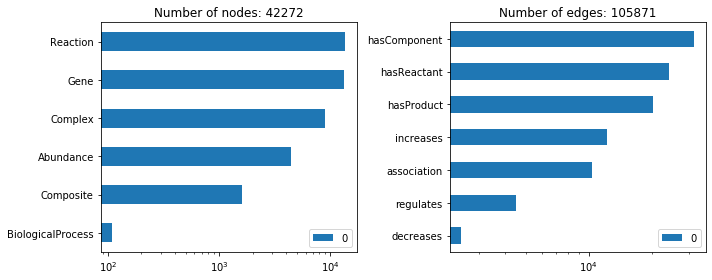

In [3]:
GRAPH_PATH = os.path.join(DEFAULT_DIFFUPATH_DIR, 'pickles', 'universe', 'pathme_universe_non_flatten_collapsed_names_no_isolates_16_03_2020.pickle')

pathme_universe_graph_no_flatten = pybel.from_pickle(GRAPH_PATH)
pathme_universe_graph_no_flatten.summarize()

nx.number_of_isolates(pathme_universe_graph_no_flatten)
pathme_universe_graph_no_flatten.remove_nodes_from({
    node
    for node in nx.isolates(pathme_universe_graph_no_flatten)
})

plot_summary(pathme_universe_graph_no_flatten, plt, figsize=(10, 4))
plt.show()

##### Import kernel

In [ ]:
KERNEL_PATH = os.path.join(DEFAULT_DIFFUPATH_DIR, 'kernels', 'kernel_regularized_pathme_universe.pickle')

kernel = process_kernel_from_file(KERNEL_PATH)

## 2. Load/import preprocessed datasets mapping 

##### Dataset 1

In [6]:
MAPPING_PATH_DATASET_1 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_1_mapping.json')

dataset1_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET_1)

In [7]:
dataset1_mapping_by_database = reduce_dict_dimension(dataset1_mapping_by_database_and_entity)

dataset1_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset1_mapping_by_database.items() for entity, entity_value in entity_set.items()}


In [8]:
dataset1_mapping_kegg = dataset1_mapping_by_database['kegg']

##### Dataset 2

In [9]:
MAPPING_PATH_DATASET2 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_2_mapping.json')

dataset2_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET2)

In [10]:
dataset2_mapping_by_database = reduce_dict_dimension(dataset2_mapping_by_database_and_entity)

dataset2_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset2_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [11]:
dataset2_mapping_kegg = dataset2_mapping_by_database['kegg']

##### Dataset 3

In [12]:
MAPPING_PATH_DATASET3 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_3_mapping.json')

dataset3_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET3)

In [13]:
dataset3_mapping_by_database = reduce_dict_dimension(dataset3_mapping_by_database_and_entity)

dataset3_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset3_mapping_by_database.items() for entity, entity_value in entity_set.items()}

## 3. Evaluation: random cross-validation by method

In [3]:
from diffupath.views import show_box_plot, fdr_barchart_three_plot

from diffupath.cross_validation import cross_validation_by_method, get_p_values, get_wilcoxon_test

from collections import defaultdict

In [4]:
metrics_by_method = defaultdict(lambda: defaultdict(lambda: list))

In [17]:
metrics_by_method['auroc']['Dataset 1'], metrics_by_method['auprc']['Dataset 1'] = cross_validation_by_method(dataset1_mapping_all_labels, 
                                                                                                              kernel, 
                                                                                                              kernel_kegg, 
                                                                                                              k = 3)

100%|██████████| 3/3 [00:36<00:00, 12.21s/it]


In [18]:
metrics_by_method['auroc']['Dataset 2'], metrics_by_method['auprc']['Dataset 2'] = cross_validation_by_method(dataset2_mapping_all_labels, 
                                                                                                               kernel, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:34<00:00, 11.64s/it]


In [19]:
metrics_by_method['auroc']['Dataset 3'], metrics_by_method['auprc']['Dataset 3'] =  cross_validation_by_method(dataset3_mapping_all_labels, 
                                                                                                               kernel, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:35<00:00, 11.81s/it]


### 3.1. Result metrics AUROC

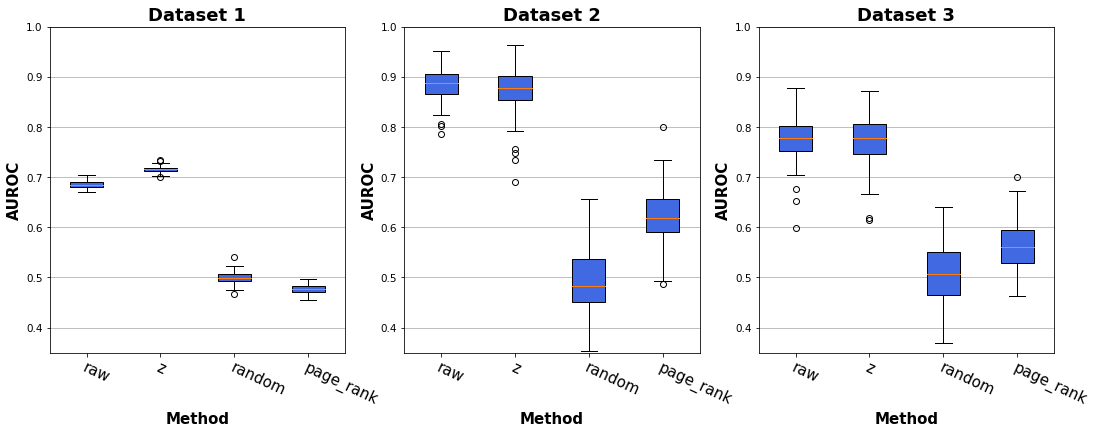

In [8]:
show_box_plot(metrics_by_method['auroc'], 'Method', 'AUROC', y_lim = [0.35, 1], color_palette = ['royalblue', 'royalblue', 'royalblue', 'royalblue'])



##### Wilcoxon test

In [9]:
df_wilcoxon = get_wilcoxon_test(metrics_by_method['auroc'], True, "AUROC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUROC,p_value,Significant difference
Dataset 1,"('raw', 'z')",3.89656e-18,True
Dataset 1,"('raw', 'random')",3.89656e-18,True
Dataset 1,"('raw', 'page_rank')",3.89656e-18,True
Dataset 1,"('z', 'random')",3.89656e-18,True
Dataset 1,"('z', 'page_rank')",3.89656e-18,True
Dataset 1,"('random', 'page_rank')",8.77788e-18,True
Dataset 2,"('raw', 'z')",0.0040036,True
Dataset 2,"('raw', 'random')",3.89656e-18,True
Dataset 2,"('raw', 'page_rank')",3.89656e-18,True
Dataset 2,"('z', 'random')",3.89656e-18,True


### 3.2. Result metrics AUPRC

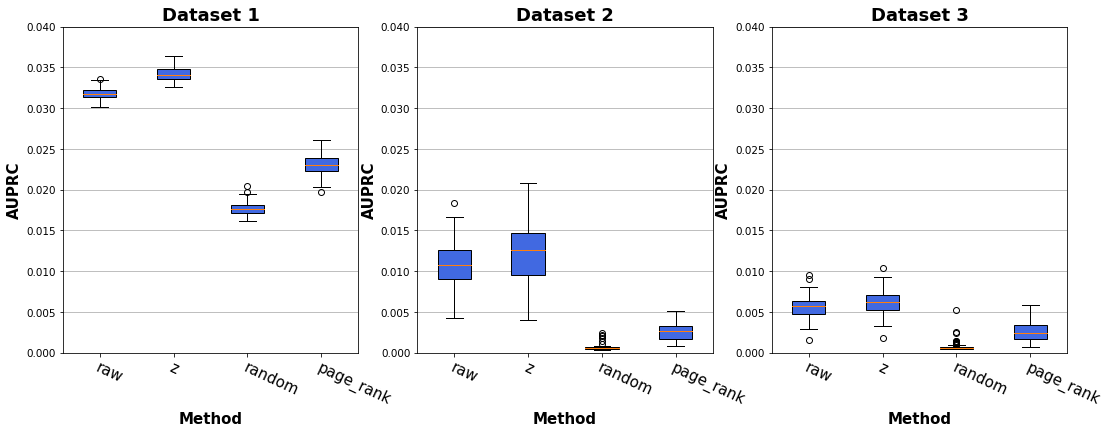

In [12]:
show_box_plot(metrics_by_method['auprc'], 'Method', 'AUPRC', y_lim = [0, 0.04],  color_palette = ['royalblue', 'royalblue', 'royalblue', 'royalblue'])


##### Wilcoxon test

In [13]:
df_wilcoxon = get_wilcoxon_test(metrics_by_method['auprc'], True, "AUPRC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUPRC,p_value,Significant difference
Dataset 1,"('raw', 'z')",3.89656e-18,True
Dataset 1,"('raw', 'random')",3.89656e-18,True
Dataset 1,"('raw', 'page_rank')",3.89656e-18,True
Dataset 1,"('z', 'random')",3.89656e-18,True
Dataset 1,"('z', 'page_rank')",3.89656e-18,True
Dataset 1,"('random', 'page_rank')",3.89656e-18,True
Dataset 2,"('raw', 'z')",3.69817e-14,True
Dataset 2,"('raw', 'random')",3.89656e-18,True
Dataset 2,"('raw', 'page_rank')",3.89656e-18,True
Dataset 2,"('z', 'random')",3.89656e-18,True


### 3.3. Export evaluation by method to  .json file

In [25]:
OUTPUT_PATH = os.path.join(ROOT_RESULTS_DIR, 'outputs', 'metrics_by_method_validation.json')
to_json(metrics_by_method, OUTPUT_PATH)

## 4. Evaluation stratified by entity: random cross-validation by method

In [20]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest

from diffupath.cross_validation import cross_validation_by_method, get_p_values, get_wilcoxon_test

from collections import defaultdict


In [21]:
metrics_by_method_entity = {"auroc": {"Dataset 1": {"gene_nodes": {"raw": [0.6789208070967483, 0.68632854966914, 0.6912002221133962, 0.6760443615591682, 0.6821615359914557, 0.6812479955276989, 0.691806038311136, 0.6889967885962119, 0.6742803436066049, 0.692041791751172, 0.6862982201652605, 0.6906833362362061, 0.6900023548999159, 0.6810644707447235, 0.6823292044702857, 0.6822063386950693, 0.6806721959887931, 0.6766213466161412, 0.6939386700548772, 0.6555338946036897, 0.6865576016389918, 0.6974207177383239, 0.6805623709123132, 0.6796643409765988, 0.6819695314611961, 0.6765296336212396, 0.6871132638362885, 0.6827717978819468, 0.6879201406050772, 0.6738264713077788, 0.6804466841076133, 0.6688657203532147, 0.6885208030923315, 0.6769926442884984, 0.680900688130669, 0.6898786987793214, 0.6853782746108366, 0.6877153258934832, 0.6769758494492165, 0.6768217485660417, 0.6848834031455284, 0.6715363797130063, 0.6833215654199659, 0.6976479749655468, 0.6887353489313921, 0.6619441719125019, 0.6876261321244738, 0.675905326634761, 0.6893277786542927, 0.7001755159498119, 0.6775518630399956, 0.6895811666755746, 0.6900626681315719, 0.6850704350861185, 0.6655557868413489, 0.6945096616594006, 0.6706102760508457, 0.685758562461868, 0.6776871273583288, 0.6823325305070846, 0.6802284170590649, 0.6857057575113026, 0.691246062145318, 0.6791149686112687, 0.703974096957134, 0.6863707672847464, 0.6637578005030614, 0.6885026251486384, 0.6778560142862832, 0.6805396155516392, 0.6892947982002914, 0.6846150479586515, 0.694886804594449, 0.6852288005412286, 0.6710922056105894, 0.6904331260619648, 0.6863624521927492, 0.6950632821311373, 0.6786678965757991, 0.6772668447380665, 0.6681341898437919, 0.6764731897888299, 0.6882700824867005, 0.6873058775911103, 0.6890274309451367, 0.678879824395795, 0.6850133984946752, 0.6928515005908984, 0.6758080318256277, 0.679505234572697, 0.6700095147704189, 0.6932177927425284, 0.6912911612284484, 0.6891382604188678, 0.6783530592013803, 0.6907774367327701, 0.6805181609677332, 0.7020950672865477, 0.6905831105629627, 0.6824219218624383], "z": [0.7135845320979182, 0.7010557137179358, 0.7224522072387008, 0.7093137032617323, 0.7221480395268848, 0.7160003050733159, 0.7219099809128299, 0.7185252939006314, 0.7139802975459348, 0.7256807022455787, 0.724116509949411, 0.7210848768037617, 0.7214498846441525, 0.7117907938660373, 0.7184986362096538, 0.7180862735086998, 0.7124191513725782, 0.7021343869691017, 0.7321579119285873, 0.6996943108733313, 0.7132532456603206, 0.7271078354807841, 0.7174681904920727, 0.7111850270648834, 0.7150178234408602, 0.6991319307403221, 0.7156267516235258, 0.7162439784326602, 0.7120786936354903, 0.7143974846468001, 0.7090935097463251, 0.7151839935565776, 0.7133714681564414, 0.7075873090422657, 0.7130738537250508, 0.7185479833991906, 0.718368756119208, 0.7153866677494399, 0.7108748988316752, 0.7188061134927402, 0.7236168140841917, 0.7091430380566777, 0.729874966373274, 0.7229749219130535, 0.7163881176709668, 0.7028282608143699, 0.7280797956403957, 0.7125961228751276, 0.710598557863375, 0.7314562498882402, 0.7142077029629159, 0.7101096633849879, 0.7290281442318405, 0.7186348884597094, 0.711769800316935, 0.7117561833246938, 0.7148145564889645, 0.71214048876473, 0.7149018073255862, 0.707415408922558, 0.7139605553770143, 0.7193352167922311, 0.7249970040970516, 0.7060849612719239, 0.7267770430090477, 0.7110572051655262, 0.7084242683320034, 0.7222402629531762, 0.7177950641679766, 0.7011886399311925, 0.7230704549106151, 0.7074152771983283, 0.7210313473699331, 0.7206254062251751, 0.7035939902269184, 0.7175601504699047, 0.7183285637636325, 0.7212390929456373, 0.7160206070702124, 0.7124548486388161, 0.7080192163257956, 0.7095528486006819, 0.7190914446397145, 0.7132799198168269, 0.7170045541347232, 0.7112952967106385, 0.7135779294209064, 0.7272723096470446, 0.7140085853242545, 0.713739357464356, 0.7107361932178422, 0.7243225595756584, 0.7261780106091353, 0.7170364313983011, 0.712477439344203, 0.7328008578935629, 0.7117314191695177, 0.7256942698412338, 0.7217833939281255, 0.7198988153743646], "random": [0.48449828101526843, 0.4958621303081283, 0.5045509239450313, 0.5162434251908956, 0.5146947434227706, 0.49809113479139544, 0.49542684759121336, 0.49063873770514854, 0.5121961323724447, 0.4920727206002963, 0.5260775280736442, 0.4989894940376839, 0.488188370653936, 0.4868270336714464, 0.50003643821503, 0.5220785121853638, 0.49219393982264187, 0.5225789325338462, 0.49241925411747717, 0.5075915802004125, 0.495858376167583, 0.4917993928237496, 0.4931558889407992, 0.49356278508622226, 0.5185887421689533, 0.5004580545431175, 0.4947438903914781, 0.49139602030147, 0.505080158968752, 0.49063103183771334, 0.5067935948171258, 0.48976790882285937, 0.5057644663418414, 0.4828955593819249, 0.49613611670582336, 0.5126862123688986, 0.4995147114723999, 0.4999598405754821, 0.5107148604788485, 0.4931651754989903, 0.5127227658426295, 0.4852231594510933, 0.5110525026105273, 0.49918866107293136, 0.49847902971668984, 0.49560908806294945, 0.4968531575499833, 0.5066961188871766, 0.5154074044362943, 0.514485828794528, 0.5026213944978987, 0.48964250735622195, 0.5002000397082691, 0.48590674234091935, 0.5090750914059128, 0.5066024300288301, 0.4918391406100498, 0.5163210436932234, 0.5017981839246319, 0.4852900094976462, 0.5123491629962533, 0.5049957566685968, 0.48591737907246446, 0.5059891549465857, 0.5123339817787849, 0.5177236432906543, 0.5095243368911718, 0.5038945421086303, 0.5092573648087063, 0.501905012274887, 0.4858024167510278, 0.49911147067435, 0.49679503423364535, 0.5061021084735201, 0.5140688228144785, 0.5087319497876457, 0.5137094132538483, 0.49580212992151773, 0.5031331101990745, 0.5150519136714964, 0.5124369901263799, 0.5110899781538658, 0.49401703609220843, 0.4936730382664485, 0.4989121719148728, 0.48952583261979965, 0.5047125825058829, 0.5173447385440343, 0.481902325759223, 0.49662247549278943, 0.49936385429838065, 0.48861239094921505, 0.5077971358607986, 0.49028657297714967, 0.5152674474422794, 0.476210719381913, 0.5048871171101839, 0.5081550635238451, 0.4995973354954548, 0.49986575654444665], "page_rank": [0.47115519284410756, 0.47450339224468985, 0.47462561586428664, 0.4805991614896575, 0.4804969105563831, 0.48042360602257667, 0.4656573692741577, 0.4840975923741682, 0.48293517544399545, 0.4756703042641998, 0.4567769333486265, 0.4725381984623765, 0.47487694569447997, 0.47824068855416224, 0.4585754465838326, 0.470963073055147, 0.48410928289955063, 0.4707074621874896, 0.485378330593634, 0.47480089141737936, 0.4691634072329314, 0.4719406644255765, 0.48532840711059255, 0.4743019694320094, 0.4770542813486625, 0.4798416154448767, 0.4744323928849025, 0.47341125019104124, 0.48594426728084406, 0.4624534573016403, 0.4703065924255736, 0.4639877975942611, 0.47793917179246803, 0.48322279529946044, 0.46991497629079126, 0.48965016382707094, 0.46992474034931486, 0.47411605714737154, 0.4588286370187698, 0.46810070554461203, 0.47433513100682656, 0.4666317498664893, 0.4728641829997302, 0.4782628346902741, 0.47523703034178716, 0.47991226902856116, 0.4777921016900515, 0.4845258607758537, 0.47430562477938243, 0.4864170749376837, 0.46940884240384734, 0.47242769829921955, 0.456822015966228, 0.4784031703914492, 0.4619084153703602, 0.4855516467488106, 0.460951702290332, 0.46886138003984723, 0.4599997312825715, 0.47176881370245494, 0.4692433309092782, 0.4902331588020221, 0.47759066241184234, 0.4827445540181472, 0.4923573272640077, 0.478268070728403, 0.4753112898762586, 0.4769446538585271, 0.47754134815336297, 0.4753716525045008, 0.4657627157268291, 0.48861370819151156, 0.49015613305872785, 0.4738590796408315, 0.4734278639095073, 0.4817614137645431, 0.46674101511499316, 0.47340624467031417, 0.4749263587461316, 0.4861826222744158, 0.4696213300518193, 0.4653624387239465, 0.4836504544765837, 0.494040318349801, 0.48021199104762613, 0.486402305358433, 0.4775262327980093, 0.4750308325257815, 0.48580979330788876, 0.47282595004207106, 0.4689934829766686, 0.4676153346893684, 0.48177619980932257, 0.48251973368917317, 0.4607310806711784, 0.46432873283168136, 0.49011450820215496, 0.4838340945182599, 0.48440399939788853, 0.4628100018602754]}, "mirna_nodes": {"raw": [0.9586941092973741, 0.9810981523976249, 0.9586941092973741, 0.9318445269806723, 0.9462752241489437, 0.9595102909865152, 0.9595102909865152, 0.9240004731488053, 0.9318445269806723, 0.9595102909865152, 0.9810981523976249, 0.9810981523976249, 0.9586941092973741, 0.9595102909865152, 0.9595102909865152, 0.9318445269806723, 0.9462752241489437, 0.9240004731488053, 0.9318445269806723, 0.9240004731488053, 0.9586941092973741, 0.9586941092973741, 0.9462752241489437, 0.9595102909865152, 0.9240004731488053, 0.9462752241489437, 0.9586941092973741, 0.9810981523976249, 0.9595102909865152, 0.9595102909865152, 0.9595102909865152, 0.9318445269806723, 0.9595102909865152, 0.9318445269806723, 0.9810981523976249, 0.9586941092973741, 0.9240004731488053, 0.9318445269806723, 0.9810981523976249, 0.9240004731488053, 0.9595102909865152, 0.9810981523976249, 0.9318445269806723, 0.9318445269806723, 0.9586941092973741, 0.9595102909865152, 0.9240004731488053, 0.9586941092973741, 0.9240004731488053, 0.9462752241489437, 0.9462752241489437, 0.9810981523976249, 0.9318445269806723, 0.9462752241489437, 0.9595102909865152, 0.9462752241489437, 0.9586941092973741, 0.9595102909865152, 0.9595102909865152, 0.9595102909865152, 0.9318445269806723, 0.9462752241489437, 0.9462752241489437, 0.9240004731488053, 0.9810981523976249, 0.9810981523976249, 0.9462752241489437, 0.9810981523976249, 0.9595102909865152, 0.9462752241489437, 0.9240004731488053, 0.9240004731488053, 0.9586941092973741, 0.9595102909865152, 0.9240004731488053, 0.9810981523976249, 0.9318445269806723, 0.9462752241489437, 0.9586941092973741, 0.9462752241489437, 0.9240004731488053, 0.9586941092973741, 0.9462752241489437, 0.9318445269806723, 0.9810981523976249, 0.9595102909865152, 0.9595102909865152, 0.9240004731488053, 0.9318445269806723, 0.9240004731488053, 0.9595102909865152, 0.9810981523976249, 0.9810981523976249, 0.9318445269806723, 0.9318445269806723, 0.9595102909865152, 0.9595102909865152, 0.9462752241489437, 0.9595102909865152, 0.9462752241489437], "z": [0.9450201088242252, 0.9729601854699439, 0.9450201088242252, 0.9427976627001964, 0.9131555913037307, 0.9593446889046604, 0.9593446889046604, 0.9194109297374025, 0.9427976627001964, 0.9593446889046604, 0.9729601854699439, 0.9729601854699439, 0.9450201088242252, 0.9593446889046604, 0.9593446889046604, 0.9427976627001964, 0.9131555913037307, 0.9194109297374025, 0.9427976627001964, 0.9194109297374025, 0.9450201088242252, 0.9450201088242252, 0.9131555913037307, 0.9593446889046604, 0.9194109297374025, 0.9131555913037307, 0.9450201088242252, 0.9729601854699439, 0.9593446889046604, 0.9593446889046604, 0.9593446889046604, 0.9427976627001964, 0.9593446889046604, 0.9427976627001964, 0.9729601854699439, 0.9450201088242252, 0.9194109297374025, 0.9427976627001964, 0.9729601854699439, 0.9194109297374025, 0.9593446889046604, 0.9729601854699439, 0.9427976627001964, 0.9427976627001964, 0.9450201088242252, 0.9593446889046604, 0.9194109297374025, 0.9450201088242252, 0.9194109297374025, 0.9131555913037307, 0.9131555913037307, 0.9729601854699439, 0.9427976627001964, 0.9131555913037307, 0.9593446889046604, 0.9131555913037307, 0.9450201088242252, 0.9593446889046604, 0.9593446889046604, 0.9593446889046604, 0.9427976627001964, 0.9131555913037307, 0.9131555913037307, 0.9194109297374025, 0.9729601854699439, 0.9729601854699439, 0.9131555913037307, 0.9729601854699439, 0.9593446889046604, 0.9131555913037307, 0.9194109297374025, 0.9194109297374025, 0.9450201088242252, 0.9593446889046604, 0.9194109297374025, 0.9729601854699439, 0.9427976627001964, 0.9131555913037307, 0.9450201088242252, 0.9131555913037307, 0.9194109297374025, 0.9450201088242252, 0.9131555913037307, 0.9427976627001964, 0.9729601854699439, 0.9593446889046604, 0.9593446889046604, 0.9194109297374025, 0.9427976627001964, 0.9194109297374025, 0.9593446889046604, 0.9729601854699439, 0.9729601854699439, 0.9427976627001964, 0.9427976627001964, 0.9593446889046604, 0.9593446889046604, 0.9131555913037307, 0.9593446889046604, 0.9131555913037307], "random": [0.8173054175538207, 0.9445955856260794, 0.30169150697894487, 0.21702822265856025, 0.5068013531735706, 0.46853560444759873, 0.1695410456588597, 0.09316299976342557, 0.7781457736982802, 0.5605867045185711, 0.5462846869011853, 0.16706489082349596, 0.8509226401703336, 0.5727466288147622, 0.3534776437189496, 0.3218045468524521, 0.7764897920560195, 0.4656730541755382, 0.6342409689858295, 0.2943103856162763, 0.7475396262124439, 0.3240596167494677, 0.7123323318587211, 0.4230186893778093, 0.6657795126567305, 0.1891131035461664, 0.9734445233025787, 0.6492867450497977, 0.6030399810740478, 0.7281641826354388, 0.12331440738112137, 0.48841995694447726, 0.382245091081145, 0.23070189964751253, 0.6419767689432472, 0.5519753962621244, 0.3495859947953631, 0.48565210191384167, 0.23699462988810294, 0.4416607523066004, 0.5371894960965224, 0.3326393981689575, 0.7261006363700883, 0.7320858271628303, 0.4546605157321978, 0.48976815708540333, 0.5032528980364325, 0.5299384906553111, 0.9187366926898509, 0.6009320810957868, 0.8171323129332166, 0.07009533722883299, 0.4545669608005488, 0.6101109507700315, 0.14730305180979414, 0.5031581935605971, 0.6271350839839129, 0.37486396971847646, 0.3919328128696475, 0.7933522592855453, 0.6398476496889121, 0.9108608738851695, 0.06990608218400318, 0.6388218594748047, 0.30451136713113014, 0.1405455276667219, 0.8626718080953846, 0.9669513377965981, 0.3127158741424178, 0.12046083603416058, 0.5875443577004968, 0.12803406671398154, 0.36602791577951266, 0.5575703808847883, 0.5340785427016796, 0.9959546734167632, 0.31733339641834823, 0.6519363156774147, 0.8988052992666193, 0.23436871614108967, 0.2824461793233972, 0.2646794416844097, 0.015613541198457592, 0.34058811005180856, 0.9193300371413026, 0.6834161343742606, 0.9811450201088242, 0.2307073574639224, 0.17243500272054124, 0.2896143837236811, 0.3771232552637805, 0.2399990537247758, 0.9964514679094415, 0.34709375221783256, 0.38366728963118923, 0.6141471492784482, 0.6400638750887153, 0.5717868041919992, 0.7068724863969718, 0.3815854841380616], "page_rank": [0.4228294298556896, 0.2479004518464195, 0.4228294298556896, 0.8410494192235811, 0.004613091717726059, 0.5444759876981311, 0.5444759876981311, 0.12624792997397682, 0.8410494192235811, 0.5444759876981311, 0.2479004518464195, 0.2479004518464195, 0.4228294298556896, 0.5444759876981311, 0.5444759876981311, 0.8410494192235811, 0.004613091717726059, 0.12624792997397682, 0.8410494192235811, 0.12624792997397682, 0.4228294298556896, 0.4228294298556896, 0.004613091717726059, 0.5444759876981311, 0.12624792997397682, 0.004613091717726059, 0.4228294298556896, 0.2479004518464195, 0.5444759876981311, 0.5444759876981311, 0.5444759876981311, 0.8410494192235811, 0.5444759876981311, 0.8410494192235811, 0.2479004518464195, 0.4228294298556896, 0.12624792997397682, 0.8410494192235811, 0.2479004518464195, 0.12624792997397682, 0.5444759876981311, 0.2479004518464195, 0.8410494192235811, 0.8410494192235811, 0.4228294298556896, 0.5444759876981311, 0.12624792997397682, 0.4228294298556896, 0.12624792997397682, 0.004613091717726059, 0.004613091717726059, 0.2479004518464195, 0.8410494192235811, 0.004613091717726059, 0.5444759876981311, 0.004613091717726059, 0.4228294298556896, 0.5444759876981311, 0.5444759876981311, 0.5444759876981311, 0.8410494192235811, 0.004613091717726059, 0.004613091717726059, 0.12624792997397682, 0.2479004518464195, 0.2479004518464195, 0.004613091717726059, 0.2479004518464195, 0.5444759876981311, 0.004613091717726059, 0.12624792997397682, 0.12624792997397682, 0.4228294298556896, 0.5444759876981311, 0.12624792997397682, 0.2479004518464195, 0.8410494192235811, 0.004613091717726059, 0.4228294298556896, 0.004613091717726059, 0.12624792997397682, 0.4228294298556896, 0.004613091717726059, 0.8410494192235811, 0.2479004518464195, 0.5444759876981311, 0.5444759876981311, 0.12624792997397682, 0.8410494192235811, 0.12624792997397682, 0.5444759876981311, 0.2479004518464195, 0.2479004518464195, 0.8410494192235811, 0.8410494192235811, 0.5444759876981311, 0.5444759876981311, 0.004613091717726059, 0.5444759876981311, 0.004613091717726059]}, "metabolite_nodes": {"raw": [0.8174680164269659, 0.919801929999493, 0.7291781446992613, 0.8658025046052965, 0.7309661827584459, 0.7780838586469723, 0.8589308952020416, 0.8309408325024082, 0.7046627570938466, 0.9593348092815738, 0.904578256240388, 0.8588734346216896, 0.8243937063764344, 0.8560274458772034, 0.5730645079515303, 0.7729022663128897, 0.8269185918777779, 0.8464180088218892, 0.8723090703216103, 0.7559209748018455, 0.7585506413614778, 0.7648611650977675, 0.9628906051951124, 0.7949637491338662, 0.841662300789238, 0.6243430058643592, 0.8402562065876865, 0.8291020939311486, 0.7674468912136012, 0.8567440131145325, 0.904274053167937, 0.8354193777357151, 0.7648611650977675, 0.7761234388467324, 0.8624630308766118, 0.8402562065876865, 0.7480387351912254, 0.8696963039326696, 0.883530783660915, 0.8614693008399384, 0.6321170843825522, 0.8335299386523803, 0.6704568116137973, 0.7376214699768467, 0.7819911781108988, 0.7372665663923206, 0.8447854523330685, 0.684443392878268, 0.7873113518446536, 0.8559801253992665, 0.729820351185547, 0.8379239830322287, 0.962826384546484, 0.8228625509117642, 0.7771273089858207, 0.9628703249902825, 0.8420172043737641, 0.8565682513393384, 0.8401243852562911, 0.8812526406516705, 0.8342701661286778, 0.780757465650403, 0.8331344746581939, 0.7651383278971118, 0.7745348228017103, 0.8805597336533099, 0.8445387098409693, 0.8450558550641362, 0.7448581230670429, 0.9351743252606851, 0.962826384546484, 0.8673607003430734, 0.7406804008720489, 0.7585506413614778, 0.8624596508424736, 0.8567440131145325, 0.9221983742035795, 0.8220986631964982, 0.8227172094438153, 0.8424836490848557, 0.9388213820959591, 0.8214801169491812, 0.7502188572104578, 0.8191816937351066, 0.836565209308614, 0.7151239627520238, 0.8866032346926703, 0.7622416386405503, 0.8276723394906289, 0.8465802504605296, 0.7143702151391729, 0.7909786888847578, 0.7956228557908435, 0.8690540974463842, 0.7205793378513122, 0.8437038414087982, 0.791343732571699, 0.647749742272397, 0.8382822666508931, 0.837751601291173], "z": [0.7590170860725693, 0.4947322167953896, 0.6666035726960842, 0.7578712544996704, 0.40652008585286703, 0.6444406888509575, 0.7947406668807354, 0.7890216491186561, 0.7806628246945294, 0.8856737253046255, 0.6113298744317317, 0.7105710567676733, 0.7798414763989115, 0.8196819387875817, 0.6084365652093087, 0.6520018252184347, 0.7923678829156174, 0.8957428470027547, 0.46008686687735545, 0.7774416521606868, 0.7446925013942641, 0.5951631711480286, 0.7191732436497609, 0.7102871339000524, 0.49728752260397824, 0.6418076422571868, 0.7796352943164726, 0.7146406178702405, 0.5389532034273545, 0.7930810701188082, 0.7093474844095926, 0.8039309797028948, 0.5951631711480286, 0.7757110746818543, 0.928164134457758, 0.7796352943164726, 0.7561203968160077, 0.7908130672119787, 0.6681076878876477, 0.7882611414375285, 0.6517686028628888, 0.685393182471143, 0.6720893681026179, 0.74545638910953, 0.5376721704889219, 0.6952493620185564, 0.8749319768129658, 0.6462490071149718, 0.713352824863531, 0.8704196312382755, 0.7497862128407498, 0.796177181389532, 0.716371195349073, 0.7897652566290918, 0.5987798076760575, 0.8595088810396984, 0.7980260600632068, 0.8206283483463183, 0.7437325716989741, 0.6966588362542462, 0.7662706393334573, 0.6637575839515979, 0.8131145324567778, 0.7674130908722179, 0.4824931131804432, 0.6689391762856804, 0.838417468016427, 0.34564229098713894, 0.49572256679792465, 0.7193591455273699, 0.716371195349073, 0.4621013672238089, 0.5213804059421001, 0.7446925013942641, 0.7865170438221425, 0.7930810701188082, 0.3397373713474506, 0.7881225600378565, 0.3790099880008788, 0.8722042892633215, 0.5469368440621251, 0.7409339034324247, 0.7242061144817563, 0.7255175677274341, 0.795109090601815, 0.7081205320173733, 0.8015717158743303, 0.6391374152878944, 0.7000895709046662, 0.6857345659191157, 0.7814672728194554, 0.731084483953288, 0.6563722093593145, 0.7546940224096264, 0.4747156546281117, 0.8737895252742052, 0.27205218772709605, 0.6531104764158118, 0.7417755319328725, 0.7585371212249243], "random": [0.7019722499197242, 0.48932416217403796, 0.6994946848963174, 0.618008821889101, 0.5587602034780551, 0.35594125500667556, 0.6322117253384258, 0.4508661337479508, 0.5834310726538339, 0.4481418262324449, 0.3039664700613476, 0.6446739112065032, 0.43685927227865, 0.6069561102567136, 0.4547126125973872, 0.6708590356762604, 0.7696574335400789, 0.323732909702388, 0.42209528316235995, 0.3803518615538017, 0.4346183096449274, 0.5757212147842693, 0.5901708607256932, 0.5512666677933448, 0.4146896283652465, 0.4140440418448226, 0.40495175001267514, 0.40213280154129555, 0.3719490966858765, 0.5794662926095553, 0.418370485541904, 0.4861908705277923, 0.6006895269642223, 0.4682428892531814, 0.35491372462861875, 0.5124740159875615, 0.6009227493197682, 0.5675516722718899, 0.5974886346352097, 0.36913014821449697, 0.6216930590998969, 0.6030656909634787, 0.2988490983758936, 0.6935965253249057, 0.47416470906356156, 0.5033715840529989, 0.4483851886904058, 0.6279326021192815, 0.5726825640938973, 0.419959101586926, 0.5327136604079701, 0.656416149803113, 0.6678339051224418, 0.6279765425630799, 0.5000726707339744, 0.4536310016731169, 0.5509388044819252, 0.45824812830609585, 0.6938466478511433, 0.6118740599280053, 0.6411181152929645, 0.44809788578864646, 0.43737641750181677, 0.300049010495006, 0.38787919757989553, 0.37734025113653646, 0.49805817038752087, 0.4946612360784844, 0.37526829020973107, 0.5157222287945109, 0.539750891484004, 0.6173699954369538, 0.544486319311825, 0.4357979415592097, 0.5065859965185648, 0.5371279849926484, 0.5839989183890757, 0.48557570431461355, 0.7268188808706968, 0.41490257051596224, 0.5720876780855486, 0.5874397931419109, 0.5654492910378395, 0.4780923087323182, 0.49808521066062766, 0.36937013063831947, 0.29988676885636545, 0.5111118622298085, 0.5230332426357507, 0.6252691352182658, 0.3483125179564313, 0.4676243430058643, 0.48211454935694853, 0.40854134626759736, 0.524506937520069, 0.5395683696405333, 0.5360193337952713, 0.46948336178195405, 0.6472562572881986, 0.5633232495648206], "page_rank": [0.8401210052221527, 0.7944533639789761, 0.6877896266752295, 0.7922935221645739, 0.8842777712054891, 0.742407598316743, 0.8544422098663196, 0.8623007892379713, 0.673522502577276, 0.7851379898936979, 0.8048097885788646, 0.8218620608068141, 0.7236416487806527, 0.7693971709114262, 0.6624833110814419, 0.7129134204255463, 0.750289837927363, 0.716077132379037, 0.9362491761166788, 0.7345490189450914, 0.7229217015091852, 0.7422757769853474, 0.9396900508695137, 0.7199675516722719, 0.8072129928512277, 0.6574707204542766, 0.7189231211235234, 0.7483023778540162, 0.7455713102702337, 0.7126294975579253, 0.7844619830660289, 0.8591438373527572, 0.7422757769853474, 0.7026110763718714, 0.846877693464704, 0.7189231211235234, 0.6959963495631305, 0.713234523668689, 0.8022680029068293, 0.7355630291865948, 0.6577816835950043, 0.7230332426357506, 0.8200638826452147, 0.7202007740278177, 0.8328167514491897, 0.6931436007503675, 0.8660965675753325, 0.7203630156664582, 0.876757195247672, 0.7157661692383093, 0.7007148772202599, 0.8739281066738774, 0.9013942640820672, 0.7606090821517297, 0.7332341856652751, 0.9117506886819556, 0.8642138885602744, 0.7668114447955925, 0.747153166246979, 0.7623666999036689, 0.85699413564077, 0.7079008297983809, 0.8548849943384428, 0.6987172770444982, 0.8843622720589478, 0.7972723124503558, 0.8299437224315965, 0.9093170641023475, 0.8821044092545335, 0.9166213178753105, 0.9013942640820672, 0.891108820199084, 0.8638894052829933, 0.7229217015091852, 0.8124419056632473, 0.7126294975579253, 0.9412279664024606, 0.7650741072484832, 0.8069020297105001, 0.8635108414594987, 0.91400855148637, 0.8814250223927261, 0.7298744317317605, 0.837535279106319, 0.7402646566730324, 0.734281996248162, 0.8318027412076862, 0.7072924236534789, 0.8697977049568201, 0.8575721214784269, 0.7917121562927785, 0.8718122053032735, 0.708194892768417, 0.839918203173852, 0.8720792280002028, 0.7263963766034037, 0.910969900795998, 0.6504774298220413, 0.7133190245221477, 0.8843217116492877]}}, "Dataset 2": {"gene_nodes": {"raw": [0.8755189211848307, 0.9270941089768294, 0.86279013948331, 0.8268409024833845, 0.8721653718991501, 0.9162593050850896, 0.8237408977505527, 0.8762170138536743, 0.853592388254464, 0.8851595302326525, 0.840191713487894, 0.8910366929676883, 0.9390039417726483, 0.8113713041655679, 0.9118881969939758, 0.9314567655828483, 0.9080985510773953, 0.8505414021351833, 0.8495517332305632, 0.875129307721953, 0.8051746752939426, 0.9138126001500984, 0.9683407368342766, 0.8994814168745732, 0.9856578297938513, 0.971373974834858, 0.9009714136968148, 0.9110337518508753, 0.878569062155602, 0.8240282482437813, 0.8228839171619238, 0.8627064697808698, 0.8536692967688282, 0.8700313719126724, 0.948804283888765, 0.9344942293259771, 0.924178346619068, 0.8627783074041769, 0.9389363298918886, 0.8811197203572612, 0.9824944389228075, 0.9643102235924897, 0.9249812377030892, 0.9155595221192268, 0.8274003907966707, 0.9685756881199165, 0.8681382392514012, 0.9861750606816629, 0.8849465528082595, 0.9341849049715016, 0.9688562774250692, 0.8721053663549758, 0.8930853329547068, 0.9108080971988399, 0.9726053562131938, 0.941666159577561, 0.8811188752087518, 0.9543078909826035, 0.818940454216615, 0.9054177400052736, 0.8773140166190003, 0.9760704651021277, 0.9100491538373123, 0.8722152356612105, 0.9179107252726448, 0.8519620967796461, 0.923946775927466, 0.8524920048951001, 0.9096020702757889, 0.9226249636586141, 0.9043494722892707, 0.9008277384502005, 0.8666169719343083, 0.9389380201889077, 0.9084788679066687, 0.8626921022562084, 0.9304594903416428, 0.8232270474567791, 0.8636707842302049, 0.9103787617560157, 0.8823950494580908, 0.8145786427591056, 0.947512896966255, 0.8836923524201673, 0.9278868582787368, 0.9639425839908589, 0.8283165317809645, 0.9827057260501816, 0.8697203572611779, 0.9166751181517617, 0.8710472404210868, 0.8818076712439908, 0.9217764345550801, 0.812000094656633, 0.9274406198657228, 0.8720107097219123, 0.8262408470416421, 0.8619754163201557, 0.8237324462654578, 0.9336287972522532], "z": [0.9074697605863302, 0.9597878339181761, 0.9108875411587323, 0.8879806359573503, 0.8708613077489976, 0.9259447070039147, 0.893457198298885, 0.9176250650764353, 0.7419322123283504, 0.9446292502518542, 0.8823198312407456, 0.948998668045949, 0.9552324834519923, 0.8785149726509942, 0.9269115568987784, 0.9575076232395557, 0.9489834553727781, 0.8999969574653659, 0.9004820727098165, 0.8819936039160801, 0.8723673623929197, 0.9264602475947074, 0.9741874742229705, 0.7806569170334611, 0.9845134987119937, 0.9754197007498158, 0.9419957674962645, 0.948272685476292, 0.9396986538474541, 0.8679134297478752, 0.8945981487867048, 0.9090839942394677, 0.9025509962610629, 0.9088541138448847, 0.9644327701263666, 0.9579301974943037, 0.9547946965240732, 0.9049664307012029, 0.9130274571847765, 0.9453763615342488, 0.9694630940548874, 0.9098750532443561, 0.9328918277519727, 0.9579504810585315, 0.8963476062013618, 0.9722453229481485, 0.8413351994212421, 0.982711642089748, 0.9470920130085259, 0.9640558338911314, 0.9691047510868609, 0.9064352988107071, 0.9388011061303692, 0.9457296336112182, 0.9758270623313929, 0.9668296112992975, 0.9018748774534662, 0.918750802891084, 0.890641163465244, 0.909268236614538, 0.9081154540475853, 0.9747418916452, 0.9298290095535588, 0.903233876256736, 0.896513255309223, 0.8632499002724758, 0.961552504006004, 0.8894055563443608, 0.881381716395205, 0.9536250109869308, 0.8691862234031764, 0.8549437807211483, 0.9246178238440059, 0.9677220881253255, 0.9201182531794486, 0.9063592354448524, 0.9615846196493648, 0.8912868569264991, 0.9078534580096416, 0.9520040161457171, 0.9178786096292841, 0.7749200489510017, 0.9724988675009973, 0.8675990345023427, 0.934551699424623, 0.9490443060654619, 0.8947181598750532, 0.983355645253984, 0.9065029106914666, 0.956113128198887, 0.9022112465602455, 0.9275471085779192, 0.9523927844600852, 0.8735438091181382, 0.9444686720350499, 0.9066601083142329, 0.8566915478387863, 0.876376746921969, 0.8909183721763587, 0.9566743068091925], "random": [0.35619291021818356, 0.5092036672684124, 0.5398791775690824, 0.3745917932699134, 0.6801535465812052, 0.5194925052230178, 0.5527744535269739, 0.5512683988830518, 0.5096160997410465, 0.44626714806325773, 0.4766924944051168, 0.6664976369647674, 0.5022125987978607, 0.5655361960203646, 0.5719305896432121, 0.4496967607147928, 0.5105643563687011, 0.4696828326673564, 0.5644358126610008, 0.4780954409308804, 0.504546898981089, 0.4472018823147603, 0.5534708558987986, 0.47089139503593574, 0.46390201686240307, 0.4919457347045023, 0.5080660973746307, 0.40561212416245784, 0.4685334306944417, 0.5756915005104697, 0.5797076462275951, 0.582760322643895, 0.5016480395935173, 0.5587057057666173, 0.4486825825033975, 0.6011135676761121, 0.4782357355834568, 0.44974239873430555, 0.5921938703068903, 0.5481176852396503, 0.4881358052236939, 0.468457367328587, 0.6842034982387105, 0.5706916019282909, 0.5163620751438442, 0.6010053886668966, 0.5771823424812208, 0.37714245147157255, 0.42776177629933126, 0.4689086766326579, 0.5465237351507406, 0.3084437097286735, 0.4943121505310913, 0.3935586161200246, 0.49425129983840754, 0.5543278364874274, 0.5080272205431938, 0.4474064082540584, 0.5243470382615634, 0.5018069275133026, 0.46958648573727374, 0.5997647106549563, 0.3073551584484426, 0.4556516771127022, 0.6098101458388268, 0.4572540786867068, 0.43364231962840505, 0.5229322596566669, 0.5668833627445015, 0.43507738179752947, 0.5390509320297763, 0.6689164519989452, 0.6298300237317701, 0.5281637289304476, 0.5008096522720972, 0.457227033934403, 0.6015834702473919, 0.5399535506379181, 0.5425075894336153, 0.5319871807874079, 0.42483249156541797, 0.3437371114852302, 0.4324134736955978, 0.462407794297614, 0.5066242740174303, 0.37647647444608956, 0.45182822525574196, 0.408384211273605, 0.539103331237365, 0.4624889285545256, 0.5263044022095562, 0.5499753216635226, 0.4843174242577906, 0.3874448118023299, 0.4907726685733217, 0.2916607506271002, 0.6559603253483702, 0.4434122363981799, 0.4748314773872065, 0.5087591191524174], "page_rank": [0.58533464500382, 0.605670608439315, 0.58382520976586, 0.5154645274267594, 0.6719285612867892, 0.5689573571868048, 0.6985541199299541, 0.7187134473269643, 0.5852983036179118, 0.5309915958432216, 0.5768687923841977, 0.6235142289203058, 0.7328029181287736, 0.6152182511510922, 0.7837695989939352, 0.674025374738849, 0.670909312184337, 0.640221969804534, 0.6513331372588791, 0.5360058619500618, 0.5469556060390932, 0.689606532659919, 0.6427819246397977, 0.7708075563037937, 0.6410214802945173, 0.689724008302739, 0.603287289642536, 0.6723494452445185, 0.5912709681345206, 0.5951780896939209, 0.6620715942205364, 0.6267156514742771, 0.6366224823025902, 0.7491937283219408, 0.6956417381662305, 0.6150002028356423, 0.7084389768970204, 0.6331759666808652, 0.6454940062067707, 0.5674166514539936, 0.7370675375076909, 0.7871273740221632, 0.7550015888791979, 0.5885149388450538, 0.6630561922340994, 0.6905108415650798, 0.5981090647248535, 0.6049758963645091, 0.6740786190949474, 0.644111343245235, 0.661845939568501, 0.5426521098287391, 0.644310798293476, 0.5972884255221327, 0.7542789869035786, 0.6522332204214925, 0.551346997694435, 0.6400656173302772, 0.5735887710188434, 0.6426543072148638, 0.662496703920813, 0.6479069052013819, 0.6657724995436198, 0.615814080850287, 0.6495659317255228, 0.574221787252456, 0.6666328607262868, 0.4670882267432034, 0.6245123493100209, 0.7311565688322752, 0.6272303469165601, 0.5614253936701757, 0.5393864559880462, 0.7098436137198029, 0.5925344651562172, 0.6272083730553133, 0.6221645267506406, 0.6490985645997716, 0.6211495033907358, 0.8050571996511228, 0.6687939054650683, 0.6758052574998479, 0.5676541381851619, 0.6391139801085847, 0.7108417341095177, 0.7186931637627364, 0.6650051046969974, 0.7233812025449111, 0.6168646004475906, 0.6350217710256046, 0.4587609784791383, 0.6015310710398031, 0.5959674584017903, 0.5311521740600258, 0.6176666463831024, 0.6231575762492985, 0.6270013116704868, 0.6963195472708464, 0.5781660953462743, 0.5284950271461701]}, "metabolite_nodes": {"raw": [0.9119636308326714, 0.8134356356999205, 0.8174274560173058, 0.810910750198577, 0.8334724780720285, 0.8051714522316675, 0.8122762839904683, 0.8797755657332139, 0.8766321339845533, 0.8932382417062412, 0.8409592536884622, 0.815960521201264, 0.8010140102415034, 0.8889624985212351, 0.8101671426881412, 0.7965827854861334, 0.8730256375589394, 0.9568166838485068, 0.842466748914164, 0.8684085109259603, 0.8507850129286305, 0.9168680603674096, 0.8880431292356052, 0.7917222963951935, 0.826134423957682, 0.8358249818323165, 0.7574284700275473, 0.8261006236162984, 0.805989420493147, 0.7532811681397982, 0.8197022189924118, 0.8901995910158693, 0.9119196903888729, 0.8978587483733586, 0.8486589714556116, 0.8196008179682615, 0.8598232242145646, 0.7692416893410623, 0.8685538523939091, 0.8007571276469893, 0.8503658886954758, 0.8751347788612664, 0.8431968362880464, 0.8789812577107029, 0.8299234422267665, 0.8720183873857126, 0.896050430109344, 0.8189619915161143, 0.8083892447313717, 0.8066079667404641, 0.8150107316083892, 0.8091193321052542, 0.8364029676699734, 0.8538912643017694, 0.8280779435872302, 0.8288147910293894, 0.8233526558618242, 0.8043027834581129, 0.8125061263118758, 0.8724983522333576, 0.8420577647834243, 0.9071301820148383, 0.8478072028527488, 0.728948302377854, 0.9142012134322557, 0.8908519376045698, 0.7964205438474928, 0.8939987493873689, 0.8955332848861773, 0.8473069578002738, 0.7990164100657416, 0.7863007216372886, 0.8110459515641109, 0.8161836034543948, 0.8400128441297257, 0.8594142400838248, 0.8134356356999206, 0.879904007030471, 0.8712950600801068, 0.8374169779114768, 0.7956160957225668, 0.7629615859120177, 0.8021057612681889, 0.9325716989741597, 0.8761149887613864, 0.8754998225482077, 0.8922512717378446, 0.8078247790302683, 0.8916056852174207, 0.8187355292288452, 0.8089368102617837, 0.8415304794578425, 0.848936134254956, 0.8163999256392489, 0.827408696827838, 0.8695949029085194, 0.8302986260161227, 0.8767098747697352, 0.8690405773098309, 0.7783644014804549], "z": [0.9409846039444998, 0.8722110493315982, 0.7655642121985431, 0.5541937773571513, 0.7623497997329773, 0.8569806155042166, 0.8639096854878234, 0.905156242078045, 0.8958003075831066, 0.7884301431444458, 0.7567152828243565, 0.629663179598114, 0.7302158151797333, 0.6902976120058814, 0.7321086342972064, 0.7084585354312078, 0.7023879941187405, 0.7746429838941373, 0.7611262273748963, 0.7976948167176487, 0.723165063967146, 0.831741900593196, 0.817312534856602, 0.6905747748052256, 0.7313278464112487, 0.7520474556793023, 0.8107518885940749, 0.8272903956329958, 0.8612022781430093, 0.7712426695509624, 0.8600936269456321, 0.7738182555643812, 0.6525967112267834, 0.8904361934055534, 0.6573625593618496, 0.7379324331175745, 0.8624089503303984, 0.7520474556793024, 0.9280796336042993, 0.7519021142113534, 0.7632117084382553, 0.9146439979043789, 0.7482584374102179, 0.8140406618106842, 0.8743539909753089, 0.7310743438508729, 0.8354869784184821, 0.6409930540298457, 0.6182758445860304, 0.6300518835240236, 0.7939091784827027, 0.860053066535972, 0.8838620270064728, 0.7149313008061382, 0.8316066992276622, 0.8888915178043297, 0.8662520491456964, 0.7494820097682987, 0.8275067178178499, 0.9035507258623312, 0.7608896249852124, 0.7723276605093711, 0.8875766845245137, 0.791029389396833, 0.8151425529397847, 0.6897703266802995, 0.8055702962599922, 0.8181406432204964, 0.794020719609268, 0.7348228017102973, 0.8299437224315966, 0.7285832586909128, 0.746595460614152, 0.8614997211471835, 0.8284531273765865, 0.7270284429872742, 0.8661168477801625, 0.6990552804583327, 0.7961907015260854, 0.8970948606580926, 0.7045275557283128, 0.8001284412972571, 0.8475537002923729, 0.7651755082726335, 0.9096280272430751, 0.6565074107248484, 0.9388720826080343, 0.850534890402393, 0.8904125331665851, 0.8702675297020499, 0.863024116543577, 0.8600632066383871, 0.7766879045478359, 0.8653631001673117, 0.7427625019012691, 0.7249632421287454, 0.7541599770157679, 0.8521032262425849, 0.7656182927447567, 0.8247384698585456], "random": [0.5752040695611025, 0.2675601223572358, 0.3813388315221984, 0.38471886566054314, 0.37249328218215005, 0.6210136722380896, 0.28203342853762825, 0.5716212333744571, 0.4875935846952054, 0.5691909888289871, 0.5960757803653816, 0.44643490899258076, 0.42736813641817784, 0.5543424988592385, 0.4097750587280931, 0.4643997904378834, 0.6812053201737338, 0.5896266752294198, 0.23824170624123303, 0.6312281354041676, 0.4267157898294773, 0.4833246015784759, 0.5008568386540704, 0.44738807861959407, 0.5439218536107215, 0.5379628534248195, 0.3829747680451572, 0.3430802251102736, 0.3952510520356255, 0.6181710635277415, 0.6171908536276216, 0.612861029896402, 0.45932297916208953, 0.4831015193253452, 0.5419918541177265, 0.41589968058677385, 0.6455425799800578, 0.39853982525223497, 0.5112943840732791, 0.6123134643659901, 0.33071606023220834, 0.5287286001588616, 0.4048097885788646, 0.3797299352723462, 0.5921650808673168, 0.6238968413580978, 0.5791080089908908, 0.33797637356137294, 0.507322843960724, 0.5194774467222119, 0.5263693363302969, 0.45173480252150544, 0.40252826553548193, 0.24006016460766255, 0.5511145662571192, 0.4069865305639587, 0.534014973551233, 0.4445285697385543, 0.556857244258167, 0.45292457453820284, 0.6592587585134609, 0.49318416116002767, 0.5152219837420358, 0.26915549847053455, 0.49979212790049177, 0.49426915211843636, 0.5462844974734244, 0.6219499416944111, 0.46924675939226984, 0.6537898632776191, 0.444927413766879, 0.8626962532321577, 0.5216879890486894, 0.4304169272109648, 0.497186121579828, 0.45430700850078587, 0.3568640043264437, 0.6818475266600192, 0.5484308191512735, 0.4154028155684372, 0.5933818931571209, 0.446475469402241, 0.4571327170404421, 0.5500295752987105, 0.5464433590779266, 0.5730645079515302, 0.5083199540315357, 0.33238579709655064, 0.40889624985212353, 0.49138936303256653, 0.4111980531003363, 0.4496594615605617, 0.4854202227442497, 0.5128018792989808, 0.35660712173192943, 0.45301583545993807, 0.36104848658971456, 0.5947609470855655, 0.38019299994929945, 0.4015548157036386], "page_rank": [0.5561372969866996, 0.5048402088861097, 0.5044515049602001, 0.636761251288638, 0.5658920755099627, 0.5507782528603539, 0.4009176792685606, 0.44628618749049365, 0.5351506650217167, 0.6486353112166433, 0.5655794223521657, 0.6613932500718258, 0.550808673167599, 0.865307329604029, 0.41021277314900884, 0.5104612056581772, 0.7618039242196346, 0.8573895996349563, 0.5026989572594683, 0.5457808723868112, 0.6172770444981495, 0.640191985939058, 0.6271720944381538, 0.5212975951057105, 0.44559497050920216, 0.6225870781294891, 0.4354954285038279, 0.6199185411772659, 0.530457487620625, 0.5438846732351996, 0.4109563806594447, 0.8652769092967838, 0.7462337969613493, 0.6337969613493097, 0.6509185242770952, 0.40234743370908044, 0.5781193490054249, 0.6605195112470637, 0.5711615487316422, 0.6651721282384953, 0.5571462371769955, 0.45088641395278095, 0.6723479407142012, 0.5245542579980058, 0.5287674705514525, 0.6250629531358267, 0.752525730509878, 0.7843183316151493, 0.6487350222237245, 0.6652025485457403, 0.5232884352131957, 0.5649811563096787, 0.5616754829223776, 0.6343512869479981, 0.5185242770951985, 0.5295313582667185, 0.4539740751381589, 0.5630511568166838, 0.6174274560173059, 0.5494346892903619, 0.6386659005255954, 0.6258369809535077, 0.5349630731270385, 0.49258251508340234, 0.5609268053607341, 0.6639806662047287, 0.6472579473052678, 0.7825556438120025, 0.5574487502323773, 0.6109124402156463, 0.32778388061719427, 0.5104037450778253, 0.5186544084095248, 0.4091920028392287, 0.571335620489767, 0.5670919876290751, 0.6309898429974143, 0.7711818289364722, 0.6881986108059692, 0.5320630038363388, 0.643604130401717, 0.21503270183028847, 0.5545469909246084, 0.7483429382636765, 0.5193557654932315, 0.8599330753240608, 0.659640702371094, 0.44586537324026976, 0.659650842473509, 0.4155566071217319, 0.512695408223623, 0.5085497963529432, 0.6335890892498015, 0.5699362863564922, 0.5281185039968903, 0.7412364164878065, 0.5462523871491103, 0.6625407716617939, 0.680412702168292, 0.4337310506836119]}}, "Dataset 3": {"gene_nodes": {"raw": [0.9343627973020944, 0.7928675339500373, 0.7952793613007858, 0.8286990053387346, 0.8846018918749607, 0.8317177918380699, 0.85996784230199, 0.90689511161227, 0.7922153312869344, 0.8180229280210487, 0.8185568014923399, 0.8823466766898451, 0.9140665566901237, 0.8472864332101318, 0.8193823216187432, 0.7911016447757662, 0.8016517363068763, 0.8643411500205336, 0.7879506080032297, 0.8886515344511962, 0.6830935427063975, 0.8438228681603986, 0.8625515950079001, 0.7608567033487161, 0.8444054654165535, 0.8811035241217537, 0.7658467149728191, 0.8141619160976424, 0.7773712822012013, 0.8017930352829807, 0.8567917475829523, 0.8314442425887643, 0.8104589084480083, 0.8158303577021864, 0.7853731197839448, 0.8603374470128838, 0.8673362706815065, 0.7534966276180334, 0.7433098763111918, 0.8311115287435528, 0.9229572553195933, 0.8169941601063571, 0.8578560142551872, 0.8767330006194881, 0.7622181851086193, 0.8053129807123417, 0.8106872141827977, 0.8519214572587999, 0.864589641323338, 0.8301920413177695, 0.8122498555687805, 0.8256628174876625, 0.7708993714631753, 0.8535154210779092, 0.8559502182129508, 0.7752399646404533, 0.8641246772049254, 0.9080540416379543, 0.7650921923615026, 0.9287839239352114, 0.7589745731448418, 0.8116728267451816, 0.8295196530866518, 0.777839030535892, 0.8654325628014784, 0.7852408695107436, 0.873373843680177, 0.8936004788851997, 0.8508481418836615, 0.868350421460739, 0.8102013684423006, 0.8528827079287519, 0.7457481537165807, 0.9188331349579235, 0.8163182916048919, 0.7542170435799453, 0.8069542762081758, 0.7674030918721766, 0.8118482323706905, 0.8083046211029672, 0.8454753005213445, 0.7358419121997397, 0.8632963728622438, 0.7678562230714081, 0.8450005916459591, 0.7383706766341609, 0.8702506490704198, 0.8373941127746802, 0.8770594499780742, 0.8701399764733724, 0.8222201340600137, 0.8878113971893337, 0.7286440170672458, 0.8484258737218706, 0.7104505557991745, 0.8669708422950295, 0.8747040030069535, 0.8402381897025761, 0.8883202127141235, 0.7270152505446622], "z": [0.7884301892571015, 0.8061858325154698, 0.8048612416212491, 0.8168967125366298, 0.8849234688550607, 0.8073447625411541, 0.870204709501834, 0.8927575574070594, 0.8088510235475092, 0.7640571599601857, 0.8475418850536309, 0.9344699896287942, 0.8617163301245241, 0.9299658237451885, 0.8621367467824901, 0.8364565279430906, 0.8865055997549889, 0.8633207347546756, 0.8180674754814954, 0.8689239700139907, 0.7423033821267235, 0.7709947308706941, 0.857043719156104, 0.8347790376356435, 0.868234180431136, 0.9036501075403538, 0.7281352015424558, 0.7418906220635219, 0.8014832912220621, 0.8853877369194039, 0.8572936025670473, 0.8817835689476358, 0.7887865689406753, 0.8220308073531152, 0.8136906874926044, 0.8525799244085279, 0.7942032617093695, 0.7813993471012829, 0.739401532711061, 0.8022983705374234, 0.8436119637773463, 0.8724564444166022, 0.9050735381124406, 0.8772773149018216, 0.7676522792290503, 0.6643877856431889, 0.8539504548713344, 0.8772807951721691, 0.7927902719483249, 0.7950225173491476, 0.8948505919939861, 0.6766216319683713, 0.8118308310189536, 0.8585708617845433, 0.8245915902747326, 0.8262224449595243, 0.8867046712188602, 0.9096368685919523, 0.8110937097593741, 0.9403453820292759, 0.7833336813603681, 0.7294354305442445, 0.8153243263936741, 0.7274419316892536, 0.9459639304781196, 0.8843332150041415, 0.8862578045062541, 0.9420994382843659, 0.8517063765513304, 0.8778828819422693, 0.7552597325760265, 0.860753687346433, 0.7558840930763502, 0.8227602720179304, 0.8213786046900123, 0.8282291688418357, 0.8907731072549715, 0.6550780624638922, 0.778155039083436, 0.7931550042807325, 0.8767580585659893, 0.7698413692775655, 0.8270820717353323, 0.7652167860399395, 0.872322802035262, 0.8322996930401554, 0.8385774046927965, 0.8135702701385843, 0.8375437643996184, 0.8423159110999743, 0.8009229676961305, 0.8422797162883613, 0.8750527260957631, 0.8539678562230713, 0.7258458797079357, 0.9357479449003598, 0.8589738770907724, 0.8821190670091252, 0.8524602031085775, 0.7224512240110812], "random": [0.36626643557671557, 0.6059192438068589, 0.5281282410017609, 0.55147946292468, 0.33530316634996205, 0.4748230282528347, 0.4387089589119283, 0.5467101004406023, 0.5472878253182707, 0.5359811230136357, 0.44772007489541793, 0.5543249319607148, 0.5224052844424955, 0.5830705729221045, 0.5369625592516026, 0.4970146240959997, 0.4716726875343677, 0.512938949097566, 0.3682599344317067, 0.5269950649766474, 0.576297966826063, 0.5007941976932768, 0.5320136148175991, 0.4843297347337941, 0.6032575330451669, 0.5876116296713929, 0.5035533560246961, 0.5358349516590448, 0.5705527365365742, 0.46699938051187817, 0.48295154767622345, 0.44435395741541206, 0.4742105006716922, 0.5025496460565057, 0.4852387813485352, 0.518116199266359, 0.45138688773343916, 0.43067927916640564, 0.3931132410365637, 0.39211649160906814, 0.6373391245031914, 0.5415787898403949, 0.5197867290331113, 0.59863434191568, 0.5441876004928063, 0.5514223864909826, 0.5002902545469732, 0.5800037586919753, 0.4278365943466489, 0.5957819123389505, 0.5732645631912687, 0.4764796369381974, 0.5217718752392685, 0.44971635796668685, 0.4322231270925125, 0.45841981805146625, 0.4066584532286468, 0.5760752295238295, 0.3708770977329519, 0.4269707030842156, 0.4151767629309445, 0.39098331558395455, 0.549307774227902, 0.587221839392484, 0.5307704622495075, 0.4591604195813931, 0.4302546861840228, 0.48316593232962335, 0.4145363931870228, 0.5481244823097857, 0.592158254853237, 0.519342646536783, 0.6675172447395714, 0.5374149943967648, 0.4510834081591458, 0.4384917900422505, 0.46625738687381235, 0.44419386497943164, 0.56999589328099, 0.41611365170846476, 0.5039793411152178, 0.518920837770678, 0.4647246758128171, 0.5787912325029408, 0.5617629657471792, 0.6006570750415893, 0.5781369416776295, 0.5424029178586592, 0.6460606819937773, 0.5512831756770866, 0.4739529606659845, 0.5648952090598398, 0.5087960352760202, 0.5136057688961279, 0.5031482525562586, 0.6316746364857622, 0.35470636959078977, 0.5801248721000647, 0.528863274099132, 0.40272157141166726], "page_rank": [0.58507172837186, 0.4874438806406482, 0.5302164032102014, 0.5731016865390104, 0.5659044874605859, 0.5888582625098319, 0.5025663513541732, 0.5831485309778863, 0.4842496885158039, 0.41644497344553727, 0.5127134275790544, 0.612098115781634, 0.48777729053992913, 0.5029568376871516, 0.5772501687931119, 0.45023213403217166, 0.44447576687757107, 0.41287212790689576, 0.528409446845831, 0.6237966965273862, 0.4744040037030076, 0.5709599281672201, 0.5476504694884698, 0.5467588242254658, 0.5479170581970808, 0.49553342103614606, 0.5149728190885867, 0.7074227205969359, 0.4655383630200394, 0.5222354472495423, 0.58507172837186, 0.5019044039340976, 0.5840638420792528, 0.5169865035115928, 0.5519966310983038, 0.6140609882575678, 0.4893455003584679, 0.5914225257017965, 0.5608351256725622, 0.530488560351368, 0.5426319196475182, 0.6384604676091239, 0.5696617873276396, 0.48427544251637467, 0.5025962816791608, 0.54754327716177, 0.3892731107352419, 0.49904153354632586, 0.6284365929545408, 0.5515713420618513, 0.39801346168570373, 0.5759958793599087, 0.5777589843179018, 0.6024974420012947, 0.48367822812476075, 0.5139607564715627, 0.5739592251526099, 0.4102187697940376, 0.4386873812357744, 0.4532286468012835, 0.504008575386136, 0.48813854260198936, 0.5877243904306486, 0.6202099299073552, 0.4358412161456702, 0.5613376767107269, 0.5448843506163559, 0.49760766216319685, 0.6098679585430196, 0.5275372910967724, 0.6141312897185853, 0.5750304523655398, 0.4885213723402034, 0.5642840735868362, 0.5972373613982335, 0.4586891909763551, 0.44306973765722124, 0.630507353811244, 0.5931849346057202, 0.6517697174716532, 0.5046496411841273, 0.4653539086916272, 0.6095846645367412, 0.6077477778473832, 0.5692636443998971, 0.47524970939742606, 0.5217635225904349, 0.44892703265189643, 0.5823738227985551, 0.5343843749782484, 0.5711353337927291, 0.5667307036410589, 0.5107923183472893, 0.5762012153104052, 0.45985995392122064, 0.5846972512824796, 0.5005457063904725, 0.46199753596859405, 0.5424189271022573, 0.5186166621423152]}, "metabolite_nodes": {"raw": [0.9512633670862118, 0.8027112709378252, 0.8112283524179048, 0.8625023658559667, 0.8829906785274912, 0.7643844042774677, 0.7665314185672376, 0.7044217848017412, 0.8027112709378252, 0.8629814516892211, 0.8961566669821142, 0.8710845083751301, 0.757357812056402, 0.8421678338222769, 0.7598656193810921, 0.811713352891076, 0.757357812056402, 0.8841381186713353, 0.910470095580581, 0.8899817829090565, 0.8629814516892211, 0.8813050061512255, 0.8701854831077884, 0.9120079019589288, 0.9234113277183685, 0.9512633670862118, 0.8625023658559667, 0.8907920885776474, 0.764567758114886, 0.81392542821993, 0.7598656193810921, 0.829214772404656, 0.7383954764833918, 0.757357812056402, 0.81392542821993, 0.8650397463802404, 0.7151154537711745, 0.7598656193810921, 0.7015709283618813, 0.910470095580581, 0.81392542821993, 0.9224827292514433, 0.9109728399735024, 0.9120079019589288, 0.9120079019589288, 0.8596810826156903, 0.9249787072962997, 0.8857173275291, 0.7897522948802876, 0.8857173275291, 0.7665136746474874, 0.7015709283618813, 0.7044217848017412, 0.7500354878395004, 0.757357812056402, 0.8321366045235166, 0.81392542821993, 0.9367547553704931, 0.9085655815273966, 0.9176682123592316, 0.8479760102204977, 0.9109728399735024, 0.8491352796441752, 0.8321366045235166, 0.8355907542348822, 0.8625023658559667, 0.7598656193810921, 0.867429260906596, 0.8768039651746001, 0.7500354878395004, 0.8329114223526072, 0.8321366045235166, 0.811713352891076, 0.7665136746474874, 0.8857173275291, 0.7978080344468629, 0.7822998485852182, 0.8780046370776947, 0.9512633670862118, 0.9109728399735024, 0.81392542821993, 0.8650397463802404, 0.8265768430017981, 0.8899817829090565, 0.764567758114886, 0.9109728399735024, 0.8857173275291, 0.9014502697075802, 0.7665314185672376, 0.8421678338222769, 0.8961566669821142, 0.7500354878395004, 0.7665314185672376, 0.7416544430775054, 0.8780046370776947, 0.9120079019589288, 0.8329114223526072, 0.8629814516892211, 0.8710845083751301, 0.7822998485852182], "z": [0.5299694804580297, 0.6671654679663103, 0.8455273492949749, 0.706148859657424, 0.8897274533926376, 0.6852938393110628, 0.5394092457651178, 0.6106629128418661, 0.6671654679663103, 0.46583112520109776, 0.7482610958644837, 0.3849839121794265, 0.46256032932715063, 0.8727701807513959, 0.6764691965553138, 0.6514443550676635, 0.46256032932715063, 0.5020642093309359, 0.7188357622787924, 0.7203321661777231, 0.46583112520109776, 0.8911114791331504, 0.5862709378253051, 0.9156454055077128, 0.3025160878205735, 0.5299694804580297, 0.706148859657424, 0.7575707390934039, 0.4759037569792751, 0.8435222863632061, 0.6764691965553138, 0.44230860225229485, 0.7479653638686476, 0.46256032932715063, 0.8435222863632061, 0.6335821425191634, 0.40129057442982874, 0.6764691965553138, 0.6427320904703322, 0.7188357622787924, 0.8435222863632061, 0.3258611715718747, 0.7211602157660641, 0.9156454055077128, 0.9156454055077128, 0.6735414497965364, 0.5170933093593262, 0.6909364057916154, 0.230605895713069, 0.6909364057916154, 0.5233391691113845, 0.6427320904703322, 0.6106629128418661, 0.48123284754424145, 0.46256032932715063, 0.4931390176966027, 0.8435222863632061, 0.7471136557206397, 0.4984621936216523, 0.4246238289012965, 0.8697655436737011, 0.7211602157660641, 0.6820821898362828, 0.4931390176966027, 0.6633209520204411, 0.706148859657424, 0.6764691965553138, 0.7966132771836851, 0.6957272641241601, 0.48123284754424145, 0.8547482729251443, 0.4931390176966027, 0.6514443550676635, 0.5233391691113845, 0.6909364057916154, 0.283961862401817, 0.7190960064351282, 0.7122172802119806, 0.5299694804580297, 0.7211602157660641, 0.8435222863632061, 0.6335821425191634, 0.745173653827955, 0.7203321661777231, 0.4759037569792751, 0.7211602157660641, 0.6909364057916154, 0.5620149995268289, 0.5394092457651178, 0.8727701807513959, 0.7482610958644837, 0.48123284754424145, 0.5394092457651178, 0.45966215576795677, 0.7122172802119806, 0.9156454055077128, 0.8547482729251443, 0.46583112520109776, 0.3849839121794265, 0.7190960064351282], "random": [0.6124905365761333, 0.49174907731617296, 0.4531678811393962, 0.6958692154821614, 0.31705427273587583, 0.5759676350903757, 0.6528342954480931, 0.7330604712785086, 0.7077103245954387, 0.568308176398221, 0.7480954859468155, 0.6337477524368317, 0.5877555124444024, 0.5237413646257216, 0.6162049304438346, 0.3752070123970853, 0.5001656099176681, 0.4427403709662156, 0.6799529194662629, 0.42800108829374467, 0.24254755370493042, 0.629359089618624, 0.4114637550865903, 0.3925783098324974, 0.28768808554935177, 0.46733344373994506, 0.5740039746380241, 0.5585785937352135, 0.5343758871959875, 0.7604452540929307, 0.5615299990536576, 0.27558081763982206, 0.6341972650705026, 0.3965352039367843, 0.5579043247847071, 0.5453534588814233, 0.3662522475631683, 0.5284967351187659, 0.6078061417620896, 0.39639916721869967, 0.7012042206870446, 0.6366340967161919, 0.5398765023185389, 0.37665609917668214, 0.2244369262799281, 0.5503395003312199, 0.6246037191255797, 0.5982421690167503, 0.31064280306614933, 0.4134037569792751, 0.5483994984385351, 0.4913823696413362, 0.27928338222769, 0.6160097473265828, 0.6746415728210466, 0.6277562222011923, 0.3675475537049304, 0.36236041449796536, 0.5251608782057349, 0.45686453108734737, 0.4590352039367843, 0.5881695372385729, 0.6080782151982588, 0.15093569603482543, 0.5455368127188416, 0.7452682880666225, 0.3408784423204315, 0.42282577836661306, 0.7753856345225703, 0.6102488880476957, 0.3884558058105423, 0.52785795400776, 0.8210762278792467, 0.5166260528059051, 0.45720166556260056, 0.4324843853506199, 0.6698270559288351, 0.4048925901391124, 0.5681957982398032, 0.8477039367843285, 0.35822016655626004, 0.6374148291851992, 0.5853009368789628, 0.3454149711365572, 0.5020819532506862, 0.5620682312860793, 0.61107102299612, 0.5637893915018453, 0.5921678338222769, 0.6172754802687612, 0.5444189457745813, 0.3966298381754519, 0.5866317308602252, 0.2215742405602347, 0.40052167124065485, 0.3750473171193338, 0.5332875934513106, 0.3480410712595817, 0.5262018548310778, 0.6851932904324785], "page_rank": [0.9844208384593546, 0.7533358569130311, 0.761503974638024, 0.609858521813192, 0.6570573483486326, 0.8453203368978897, 0.6081610201570928, 0.7674659316740797, 0.7533358569130311, 0.9023019778555882, 0.5999929024320999, 0.8988714867038895, 0.854712785085644, 0.5303066149332829, 0.6145961483864862, 0.7627283051007855, 0.854712785085644, 0.8499751585123497, 0.746001703416296, 0.8405827103245954, 0.9023019778555882, 0.6175534683448471, 0.8971739850477903, 0.6076878489637552, 0.9861183401154537, 0.9844208384593546, 0.609858521813192, 0.6664497965363869, 0.8470178385539888, 0.7610308034446863, 0.6145961483864862, 0.892436358474496, 0.527349294974922, 0.854712785085644, 0.7610308034446863, 0.6617121699630927, 0.6604878395003313, 0.6145961483864862, 0.7580734834863253, 0.746001703416296, 0.7610308034446863, 0.9762527207343616, 0.8482776568562506, 0.6076878489637552, 0.6076878489637552, 0.8894790385161352, 0.7390934039935648, 0.8993446578972272, 0.7472615217185578, 0.8993446578972272, 0.6064280306614933, 0.7580734834863253, 0.7674659316740797, 0.8371522191728967, 0.854712785085644, 0.7443042017601968, 0.7610308034446863, 0.7361360840352039, 0.9796832118860603, 0.7455285322229582, 0.7708964228257784, 0.8482776568562506, 0.6621853411564305, 0.7443042017601968, 0.8929095296678339, 0.609858521813192, 0.6145961483864862, 0.6698802876880856, 0.6093853506198543, 0.8371522191728967, 0.5209141667455286, 0.7443042017601968, 0.7627283051007855, 0.6064280306614933, 0.8993446578972272, 0.7395665751869026, 0.6047305290053941, 0.6587548500047318, 0.9844208384593546, 0.8482776568562506, 0.7610308034446863, 0.6617121699630927, 0.5226116684016278, 0.8405827103245954, 0.8470178385539888, 0.8482776568562506, 0.8993446578972272, 0.9070396044288823, 0.6081610201570928, 0.5303066149332829, 0.5999929024320999, 0.8371522191728967, 0.6081610201570928, 0.8448471657045519, 0.6587548500047318, 0.6076878489637552, 0.5209141667455286, 0.9023019778555882, 0.8988714867038895, 0.6047305290053941]}}}, "auprc": {"Dataset 1": {"gene_nodes": {"raw": [0.031042634227874594, 0.030736098885839405, 0.0318829916333017, 0.030550851002858804, 0.03185088394154817, 0.031798123711333184, 0.0322081433560957, 0.03199436306552164, 0.0318314784040624, 0.03218964416317699, 0.03240864578630735, 0.032173352907731316, 0.032072586032292585, 0.03147328016054443, 0.03173329126350575, 0.0315402738492919, 0.031151398177230758, 0.03096487208691956, 0.032722000504988746, 0.02936095819925965, 0.031578628588744766, 0.033914101059452736, 0.03073688491451744, 0.0309132389148187, 0.031236574000707833, 0.030235715891120094, 0.031008623484391096, 0.031361072798037334, 0.03141096806576428, 0.030747559284271468, 0.031119487540440534, 0.030124239569568972, 0.03186867457006637, 0.030548318452724713, 0.03094557261827102, 0.031715051054719, 0.031140295250571243, 0.03223487810906632, 0.030929049124710704, 0.03055952703196485, 0.03260458928843481, 0.030205029766044493, 0.031670396613950345, 0.03244036650580027, 0.03134803485222072, 0.029900142366006452, 0.03150115513409909, 0.03047134963413159, 0.030839035612483648, 0.03366045681500765, 0.03138902527576182, 0.032432499098272, 0.031824017358865336, 0.03201240942001645, 0.029962846863929415, 0.03250464197065599, 0.030133694817598526, 0.03155250663216318, 0.03069990158542403, 0.03036318941795458, 0.03069640860226297, 0.03199304393527755, 0.03218419579044156, 0.031175949573090292, 0.03348933879437584, 0.031183004111991198, 0.029366022994635425, 0.03290744423970325, 0.030896450250335966, 0.03179441634043189, 0.03209130990255793, 0.031459095650739045, 0.03252494704976412, 0.032219855546274656, 0.030154795089457696, 0.031704055545653656, 0.03215881105778931, 0.03224339143040649, 0.031209470478733386, 0.03120753322208164, 0.03010865884670288, 0.03091827168463962, 0.031563294364410854, 0.03165286182934098, 0.031584184143740944, 0.030863637236434708, 0.031026829035803852, 0.03186533695975681, 0.030805647611448946, 0.03136718889871715, 0.030455863699035086, 0.032360913644338775, 0.03270994704099618, 0.03200485703303742, 0.030668714602233454, 0.03200186428790135, 0.031594271571751, 0.03284938155407573, 0.03202743540883842, 0.03167126181556124], "z": [0.03369044619092759, 0.031906057097839106, 0.03387777837936248, 0.0332966146195274, 0.03472861124524312, 0.03470739596636378, 0.034229840200233765, 0.03439839510331716, 0.03453183167459872, 0.03458430158080097, 0.034159276276010786, 0.03417379237304184, 0.03443630712129314, 0.03322578920765751, 0.033919008408394194, 0.03441483755065802, 0.033339344718869554, 0.03277938639142004, 0.03606234974941959, 0.03194697286050732, 0.033693129605480925, 0.03585104939846381, 0.033951189954529504, 0.03347117391406101, 0.03343850612092644, 0.03212507173789937, 0.03307329809525641, 0.03385570733325247, 0.033439629602899354, 0.033321294257990956, 0.03295902490189483, 0.0329894810086256, 0.03367720205011075, 0.033260426961493395, 0.033466361342797735, 0.03431905799725886, 0.03321058875814432, 0.03433935724122511, 0.032991814358011656, 0.03364651425730223, 0.03498120718254661, 0.032852904291657395, 0.0347091693501488, 0.03467689368356496, 0.033169561486198804, 0.033262886772237016, 0.034623240601750725, 0.033591828479243496, 0.032799481842732195, 0.03628825262509758, 0.033943627784752926, 0.03361875727763389, 0.0344755815258473, 0.034759871937505446, 0.03288535584982302, 0.03415849799567261, 0.03305519557214426, 0.03408995029112877, 0.03334661824583254, 0.03270400288893867, 0.03287071325179407, 0.034454067202091515, 0.03480832806137793, 0.03292191949494094, 0.035272794063125196, 0.03286521875091152, 0.03219634034510024, 0.03526392629766059, 0.033581994532189505, 0.033417599490482945, 0.03456399727323241, 0.03327212816081715, 0.03475385794485507, 0.03465201649943568, 0.03242720918161335, 0.034259112125778035, 0.03426894983286452, 0.03362818714616857, 0.03389982450649793, 0.03364989695205509, 0.03272552429152672, 0.03317855839616905, 0.03374126915400677, 0.03383157730846139, 0.033730476378009404, 0.03333269700936013, 0.03312178375689094, 0.03433252523093848, 0.03354314895580888, 0.0339057292060305, 0.03290427633406641, 0.0346561306144546, 0.03495677158963598, 0.03402666147468912, 0.032692793487758075, 0.03475519432660203, 0.033469663443368686, 0.034331584851933106, 0.034301039857248014, 0.03437729849082011], "random": [0.017276515066430045, 0.01737248425202793, 0.017253692036824864, 0.01872467167308014, 0.018597766918875876, 0.01694087363625564, 0.017246347818947228, 0.017426255896041153, 0.018425013177005845, 0.017700997612651412, 0.018662721767906454, 0.017257444878703527, 0.016993554242711924, 0.016679977645958115, 0.017445315872326495, 0.018944598965078777, 0.01705483060375438, 0.01797936769579007, 0.01711209093161567, 0.017430563351000312, 0.017231975917925253, 0.017529472186010094, 0.017033828175599636, 0.016792878027847794, 0.018197823992087206, 0.0173122459373094, 0.01786475682286574, 0.017188188336361526, 0.017602773859430976, 0.01700414439016472, 0.019322527625651283, 0.017446347344984868, 0.017658227050020972, 0.016552389231241593, 0.017000688999218565, 0.017759457441690406, 0.017135236586807878, 0.017623738490165193, 0.017400114692693487, 0.017205171793109562, 0.01769901183228763, 0.016876767550964875, 0.018118253480513533, 0.017749392033257833, 0.017273755118359848, 0.017321687282618767, 0.017492056758889193, 0.018919262150974885, 0.01824907187283556, 0.01797536954987011, 0.017552962354328426, 0.01665698536764249, 0.01754771914774992, 0.0171957578220075, 0.01772653092553661, 0.017916588672561847, 0.017073686881756735, 0.017938793756339486, 0.01734446700400094, 0.01687728761173025, 0.01816401156332083, 0.017132726482693133, 0.017388272183589466, 0.017415267850832132, 0.018667480302489103, 0.018517414603821284, 0.01762259209276566, 0.01729814634772243, 0.018598215086413586, 0.017255333196286582, 0.016722986473645847, 0.017748145054590346, 0.017210500609274107, 0.018152741135404334, 0.01824604253028544, 0.017690429251852463, 0.01840237605338742, 0.01714375545855983, 0.01769811350663543, 0.018395504073951956, 0.01828464133885462, 0.017290210739479082, 0.01692518626907037, 0.0175749265342841, 0.01692406956477471, 0.01647620350632045, 0.01789652509844484, 0.01813486191364569, 0.016548355928345613, 0.01727005321103614, 0.017565091320900204, 0.017087414002658712, 0.01745407099022951, 0.01677310343871529, 0.018942504339468955, 0.016831800260630442, 0.017093536716867162, 0.018354715005893425, 0.017247011981111608, 0.017596340312223926], "page_rank": [0.022850957662490273, 0.02277029370223881, 0.022250005999459338, 0.02302492983549312, 0.023185237976105687, 0.022836455832000523, 0.021716307284886934, 0.022899857668466715, 0.023112218114928668, 0.020901738007766443, 0.019764201799027183, 0.022396337045059077, 0.021651416777325905, 0.022349226854638055, 0.02060383491540855, 0.021933287452353314, 0.022546901417958096, 0.020319546468992495, 0.023984256316714643, 0.021879604013904506, 0.02100124111337717, 0.02226043191106367, 0.02329713137934332, 0.022800267765601224, 0.021901572060880205, 0.02153986629162078, 0.020722246209336912, 0.021759351688854307, 0.02312395418301515, 0.021328925365150107, 0.021644866729074855, 0.020660698411815885, 0.02156168478832316, 0.02271560681122972, 0.021773145154673375, 0.02380542650745886, 0.021097040720157296, 0.021672282916216794, 0.02010293692892043, 0.021985262450365462, 0.02140831420409857, 0.021316323943727244, 0.021445557835993216, 0.02389363680526297, 0.02105885360890344, 0.02283829292447013, 0.02245677723842724, 0.023752690729644657, 0.021821887833204944, 0.022938524749273395, 0.02097698135317336, 0.02155575156893656, 0.020759926089601494, 0.02253342308578395, 0.021076638171733355, 0.023582758101700005, 0.020322665618055222, 0.022969885931945395, 0.020871307805059865, 0.02205850812851213, 0.021668188173245336, 0.02349356815538251, 0.022852209685741958, 0.022313595589823945, 0.024344832906093627, 0.021406786515888936, 0.022361096707584308, 0.02297836097590658, 0.023227013780463802, 0.02218730248597277, 0.020649442348994088, 0.022958285436812637, 0.024184464209401506, 0.022169925507653006, 0.021461902701301976, 0.023194900154536447, 0.02114843923157621, 0.02113918649465908, 0.021849008309750978, 0.022625574524641034, 0.0207707148454389, 0.020741618577221628, 0.02251676539973162, 0.023288592015217095, 0.023067579871085268, 0.02326775110728796, 0.0215065994867158, 0.021952554389894078, 0.022854311259100476, 0.02244763628358682, 0.021405681369221705, 0.02242016921303799, 0.022804848183960353, 0.021832499871615164, 0.020448069112777644, 0.021946598966622932, 0.022694529708521014, 0.022202084526642664, 0.022473343045284682, 0.021526453719792824]}, "mirna_nodes": {"raw": [0.0008780779793180074, 0.00125, 0.0008780779793180074, 0.00034698126301179735, 0.00044014084507042255, 0.0016178237174484028, 0.0016178237174484028, 0.0005037242686471697, 0.00034698126301179735, 0.0016178237174484028, 0.00125, 0.00125, 0.0008780779793180074, 0.0016178237174484028, 0.0016178237174484028, 0.00034698126301179735, 0.00044014084507042255, 0.0005037242686471697, 0.00034698126301179735, 0.0005037242686471697, 0.0008780779793180074, 0.0008780779793180074, 0.00044014084507042255, 0.0016178237174484028, 0.0005037242686471697, 0.00044014084507042255, 0.0008780779793180074, 0.00125, 0.0016178237174484028, 0.0016178237174484028, 0.0016178237174484028, 0.00034698126301179735, 0.0016178237174484028, 0.00034698126301179735, 0.00125, 0.0008780779793180074, 0.0005037242686471697, 0.00034698126301179735, 0.00125, 0.0005037242686471697, 0.0016178237174484028, 0.00125, 0.00034698126301179735, 0.00034698126301179735, 0.0008780779793180074, 0.0016178237174484028, 0.0005037242686471697, 0.0008780779793180074, 0.0005037242686471697, 0.00044014084507042255, 0.00044014084507042255, 0.00125, 0.00034698126301179735, 0.00044014084507042255, 0.0016178237174484028, 0.00044014084507042255, 0.0008780779793180074, 0.0016178237174484028, 0.0016178237174484028, 0.0016178237174484028, 0.00034698126301179735, 0.00044014084507042255, 0.00044014084507042255, 0.0005037242686471697, 0.00125, 0.00125, 0.00044014084507042255, 0.00125, 0.0016178237174484028, 0.00044014084507042255, 0.0005037242686471697, 0.0005037242686471697, 0.0008780779793180074, 0.0016178237174484028, 0.0005037242686471697, 0.00125, 0.00034698126301179735, 0.00044014084507042255, 0.0008780779793180074, 0.00044014084507042255, 0.0005037242686471697, 0.0008780779793180074, 0.00044014084507042255, 0.00034698126301179735, 0.00125, 0.0016178237174484028, 0.0016178237174484028, 0.0005037242686471697, 0.00034698126301179735, 0.0005037242686471697, 0.0016178237174484028, 0.00125, 0.00125, 0.00034698126301179735, 0.00034698126301179735, 0.0016178237174484028, 0.0016178237174484028, 0.00044014084507042255, 0.0016178237174484028, 0.00044014084507042255], "z": [0.000628312734104879, 0.0008741258741258741, 0.000628312734104879, 0.00041339396444811904, 0.0002723311546840959, 0.0011405869967488515, 0.0011405869967488515, 0.0004729187095691117, 0.00041339396444811904, 0.0011405869967488515, 0.0008741258741258741, 0.0008741258741258741, 0.000628312734104879, 0.0011405869967488515, 0.0011405869967488515, 0.00041339396444811904, 0.0002723311546840959, 0.0004729187095691117, 0.00041339396444811904, 0.0004729187095691117, 0.000628312734104879, 0.000628312734104879, 0.0002723311546840959, 0.0011405869967488515, 0.0004729187095691117, 0.0002723311546840959, 0.000628312734104879, 0.0008741258741258741, 0.0011405869967488515, 0.0011405869967488515, 0.0011405869967488515, 0.00041339396444811904, 0.0011405869967488515, 0.00041339396444811904, 0.0008741258741258741, 0.000628312734104879, 0.0004729187095691117, 0.00041339396444811904, 0.0008741258741258741, 0.0004729187095691117, 0.0011405869967488515, 0.0008741258741258741, 0.00041339396444811904, 0.00041339396444811904, 0.000628312734104879, 0.0011405869967488515, 0.0004729187095691117, 0.000628312734104879, 0.0004729187095691117, 0.0002723311546840959, 0.0002723311546840959, 0.0008741258741258741, 0.00041339396444811904, 0.0002723311546840959, 0.0011405869967488515, 0.0002723311546840959, 0.000628312734104879, 0.0011405869967488515, 0.0011405869967488515, 0.0011405869967488515, 0.00041339396444811904, 0.0002723311546840959, 0.0002723311546840959, 0.0004729187095691117, 0.0008741258741258741, 0.0008741258741258741, 0.0002723311546840959, 0.0008741258741258741, 0.0011405869967488515, 0.0002723311546840959, 0.0004729187095691117, 0.0004729187095691117, 0.000628312734104879, 0.0011405869967488515, 0.0004729187095691117, 0.0008741258741258741, 0.00041339396444811904, 0.0002723311546840959, 0.000628312734104879, 0.0002723311546840959, 0.0004729187095691117, 0.000628312734104879, 0.0002723311546840959, 0.00041339396444811904, 0.0008741258741258741, 0.0011405869967488515, 0.0011405869967488515, 0.0004729187095691117, 0.00041339396444811904, 0.0004729187095691117, 0.0011405869967488515, 0.0008741258741258741, 0.0008741258741258741, 0.00041339396444811904, 0.00041339396444811904, 0.0011405869967488515, 0.0011405869967488515, 0.0002723311546840959, 0.0011405869967488515, 0.0002723311546840959], "random": [0.00022554975524440618, 0.0004268032437046522, 4.9543497478711786e-05, 3.021330593993595e-05, 4.7963931123794903e-05, 9.12056971656903e-05, 4.171807422699854e-05, 3.891189204820654e-05, 0.00010662117496534811, 7.905977295613565e-05, 5.213764337851929e-05, 2.8401022436807727e-05, 0.0002920560635497403, 0.0003264763173747753, 5.727790749596502e-05, 3.4880881788691616e-05, 0.00010583130489998942, 6.6430905373419e-05, 6.46746863277713e-05, 4.943992310054714e-05, 0.00018298645215517506, 5.1714403691231864e-05, 8.223007976317738e-05, 5.975246385997324e-05, 0.00022682829836522385, 2.9173230643561467e-05, 0.0013299219779106292, 6.744907594765952e-05, 0.0003158566927779635, 0.00043250295900574556, 4.005112967004541e-05, 4.624063627115509e-05, 5.583888120030761e-05, 3.075030750307503e-05, 6.607201850016519e-05, 9.457516803332237e-05, 5.3379778302831016e-05, 4.599181345720462e-05, 3.100390649221802e-05, 0.00011287806181689265, 0.00011653332191788073, 3.5447165999078376e-05, 8.636324380343726e-05, 8.829242450997704e-05, 0.00014208333643830133, 7.709372537974117e-05, 7.59216607607048e-05, 7.367114352691539e-05, 0.0005106175962873698, 5.927682276229994e-05, 0.0001293493726555426, 2.5439466788776108e-05, 4.3370776770611964e-05, 6.067224851352991e-05, 4.046164685146888e-05, 4.761224586963767e-05, 9.29519831782775e-05, 6.739483376950664e-05, 5.8837819541476816e-05, 0.00016687270186612851, 6.568144499178982e-05, 0.0002653223666755107, 2.543429051046621e-05, 9.552297647949122e-05, 3.401360544217687e-05, 2.7524703421320635e-05, 0.0001722356183258698, 0.000715307582260372, 5.3494254413407374e-05, 2.689618074233459e-05, 0.00024077355392352313, 3.9570670690556196e-05, 5.520277979740926e-05, 8.657302879052826e-05, 7.942115334756725e-05, 0.005813953488372093, 3.465243606625546e-05, 6.796248470844094e-05, 0.0004030983871785986, 3.089757454039858e-05, 4.823170448143599e-05, 4.712296617205872e-05, 2.4031529366528884e-05, 3.587443946188341e-05, 0.0002931691586045148, 0.00010889616058344102, 0.008983951420516157, 4.5062692456192046e-05, 2.858531286624932e-05, 5.118013149473077e-05, 5.5457881339461096e-05, 3.112646683474959e-05, 0.006622516556291391, 3.6231884057971014e-05, 3.8381822368926074e-05, 8.935210423893908e-05, 9.965375955472432e-05, 5.524251463926638e-05, 0.00011781325491822895, 3.825262030449086e-05], "page_rank": [9.817071480064327e-05, 3.1453464599125595e-05, 9.817071480064327e-05, 0.00014880952380952382, 2.376595289588136e-05, 0.0001058582265038875, 0.0001058582265038875, 3.949268519544416e-05, 0.00014880952380952382, 0.0001058582265038875, 3.1453464599125595e-05, 3.1453464599125595e-05, 9.817071480064327e-05, 0.0001058582265038875, 0.0001058582265038875, 0.00014880952380952382, 2.376595289588136e-05, 3.949268519544416e-05, 0.00014880952380952382, 3.949268519544416e-05, 9.817071480064327e-05, 9.817071480064327e-05, 2.376595289588136e-05, 0.0001058582265038875, 3.949268519544416e-05, 2.376595289588136e-05, 9.817071480064327e-05, 3.1453464599125595e-05, 0.0001058582265038875, 0.0001058582265038875, 0.0001058582265038875, 0.00014880952380952382, 0.0001058582265038875, 0.00014880952380952382, 3.1453464599125595e-05, 9.817071480064327e-05, 3.949268519544416e-05, 0.00014880952380952382, 3.1453464599125595e-05, 3.949268519544416e-05, 0.0001058582265038875, 3.1453464599125595e-05, 0.00014880952380952382, 0.00014880952380952382, 9.817071480064327e-05, 0.0001058582265038875, 3.949268519544416e-05, 9.817071480064327e-05, 3.949268519544416e-05, 2.376595289588136e-05, 2.376595289588136e-05, 3.1453464599125595e-05, 0.00014880952380952382, 2.376595289588136e-05, 0.0001058582265038875, 2.376595289588136e-05, 9.817071480064327e-05, 0.0001058582265038875, 0.0001058582265038875, 0.0001058582265038875, 0.00014880952380952382, 2.376595289588136e-05, 2.376595289588136e-05, 3.949268519544416e-05, 3.1453464599125595e-05, 3.1453464599125595e-05, 2.376595289588136e-05, 3.1453464599125595e-05, 0.0001058582265038875, 2.376595289588136e-05, 3.949268519544416e-05, 3.949268519544416e-05, 9.817071480064327e-05, 0.0001058582265038875, 3.949268519544416e-05, 3.1453464599125595e-05, 0.00014880952380952382, 2.376595289588136e-05, 9.817071480064327e-05, 2.376595289588136e-05, 3.949268519544416e-05, 9.817071480064327e-05, 2.376595289588136e-05, 0.00014880952380952382, 3.1453464599125595e-05, 0.0001058582265038875, 0.0001058582265038875, 3.949268519544416e-05, 0.00014880952380952382, 3.949268519544416e-05, 0.0001058582265038875, 3.1453464599125595e-05, 3.1453464599125595e-05, 0.00014880952380952382, 0.00014880952380952382, 0.0001058582265038875, 0.0001058582265038875, 2.376595289588136e-05, 0.0001058582265038875, 2.376595289588136e-05]}, "metabolite_nodes": {"raw": [0.0032469081379745794, 0.00401007037425277, 0.004697059226952561, 0.005107623451030414, 0.0005865835998673378, 0.0019165645496875881, 0.008263181087605294, 0.0028680427104064918, 0.0022389325769233085, 0.005303704437415439, 0.0070832440084521225, 0.002305648250238062, 0.0034058188815765246, 0.00313751990161992, 0.00037843816748647335, 0.002570010861527459, 0.010217499063145247, 0.006303566795811367, 0.006793999703240813, 0.007612474811600169, 0.0032294811457073244, 0.002742785328033369, 0.009732837351487523, 0.005083369929345199, 0.0007150030697391245, 0.003743265230851698, 0.002502374064009839, 0.0030324589835035304, 0.0029499079346179792, 0.007398985526905415, 0.0065406297762141625, 0.009860494635597456, 0.002742785328033369, 0.004634838226533299, 0.010887230358705764, 0.002502374064009839, 0.004640410616881975, 0.005785947799833735, 0.003562465726344227, 0.003791608772045636, 0.0015640139157971286, 0.004424278028222431, 0.005775392746905575, 0.004523140617848596, 0.0010026609357708415, 0.0031772276342996925, 0.00573555549796355, 0.002351210314237897, 0.0022608239357851893, 0.008588003495628249, 0.0029527842555375316, 0.005158257343418324, 0.008679849683985552, 0.010077427493825298, 0.0013266640819296358, 0.01453640386287262, 0.004660790389688735, 0.004539903011368021, 0.006948275455490699, 0.00508075131088952, 0.005046644754949622, 0.002391424880649313, 0.0072244943345692045, 0.002511178106948669, 0.0018831969796935207, 0.004448534013265401, 0.007410877583533844, 0.003211529644654564, 0.0025252104326294014, 0.007568780226556841, 0.008679849683985552, 0.005620467533587013, 0.0008328003950963261, 0.0032294811457073244, 0.0028279224485558236, 0.007398985526905415, 0.0032171955466587226, 0.005021884092504807, 0.002108613880382821, 0.008747737181859394, 0.0026011973624253423, 0.0025701563879096294, 0.0014620309157083737, 0.004828954057553348, 0.00448975476278877, 0.005674908025842115, 0.006880600372690788, 0.0032468403282374264, 0.003911079460190421, 0.002799672569940679, 0.0018805292531160064, 0.0020586895053943733, 0.0041935606076618495, 0.005271809942781111, 0.0006846730476499261, 0.006070111657808849, 0.001533930003552321, 0.0015924228596926684, 0.003966832631363621, 0.0034889481833616045], "z": [0.003345634722907816, 0.002367538013909808, 0.008053565885996572, 0.006769199478598849, 0.0008153427452558266, 0.0036438037069150093, 0.010611109108471434, 0.0036712292973809595, 0.00218746898290061, 0.005347114641656277, 0.005609041396638295, 0.002305621247563837, 0.002885444765905159, 0.0038166845924466506, 0.0006852372431782488, 0.002541534605574298, 0.012402863844700122, 0.005877784562064035, 0.00721233042743695, 0.011074575812128772, 0.004258884529847288, 0.006381021339757665, 0.011308746637247733, 0.004077429016712139, 0.0008146068979188264, 0.009952001250217175, 0.002069672845572777, 0.0031433887306848637, 0.006244727051322051, 0.010498359599640163, 0.007087604067295247, 0.013798944557423658, 0.006381021339757665, 0.010677631795416354, 0.014315483637558926, 0.002069672845572777, 0.006572175100433524, 0.006393201186429538, 0.007141959351550751, 0.004755527016032746, 0.0016577049345796822, 0.005357213491277261, 0.00947630198086968, 0.004716015498862487, 0.0005543475549687965, 0.007160016878929396, 0.010622769020901333, 0.0030592279635138935, 0.003171277389183484, 0.012678868255864114, 0.0031005381699891134, 0.009123645862642204, 0.009314264766404033, 0.011682628358694866, 0.002249397446552574, 0.01633329415078005, 0.00587208608238019, 0.005311405397540886, 0.005999657038058582, 0.006166597500631836, 0.005265650488489465, 0.0021002278506832687, 0.011028655844379802, 0.002957162482222839, 0.0014175997920494985, 0.004433401913489313, 0.007780743078688888, 0.00555218115353515, 0.005351144069732903, 0.009008587603705568, 0.009314264766404033, 0.004229747531630073, 0.0006983437394912632, 0.004258884529847288, 0.0026028201114431456, 0.010498359599640163, 0.002486277430761446, 0.00823524864359272, 0.004902619413303761, 0.012897264375829371, 0.0016817248900255365, 0.0037843006907967414, 0.002438473492344768, 0.004796262797023679, 0.005436535144530705, 0.007865753197588072, 0.01126075657197815, 0.005117584023811507, 0.004414334827993618, 0.003034222896656525, 0.0029234617799324377, 0.0031913568265396707, 0.005276576317771871, 0.008703089043741865, 0.0010052947376408676, 0.0062055033511834445, 0.0007629203609110529, 0.0016998248619544075, 0.003322273349109291, 0.004749910485763924], "random": [0.0007010106407262715, 0.0005362804101487438, 0.0005944101545780487, 0.0010862030524042567, 0.00022498383700879593, 0.00013799573376116375, 0.0003010656924964134, 0.00017963692158149712, 0.000340749674141984, 0.00020122105594325623, 0.000126355833742652, 0.00027387872768493664, 0.00023388056698249918, 0.0002493382234079501, 0.00018865125277630176, 0.0003222125395991766, 0.0004446421759845472, 0.0001308370552550615, 0.01799434569424251, 0.00015194330423964395, 0.00015588970031117964, 0.00038789492057253173, 0.00022147086484681973, 0.00020409029033719854, 0.0001516719870670546, 0.00017658435933783355, 0.0001738197641866325, 0.00014879715162392226, 0.00014067142981618545, 0.00023400605529684952, 0.00015796962355666585, 0.0002322686412561678, 0.00039452450579722327, 0.00018215873864179974, 0.0001361242988267117, 0.0003035185708062054, 0.0002862192821131577, 0.00028384859709111154, 0.00024954634698460946, 0.00014749494535723905, 0.00027935136219269603, 0.000263118590169566, 0.0001261682210859706, 0.0004738072185824717, 0.00018560266476113892, 0.00018337809220462292, 0.00024232780790777928, 0.0008722842801650029, 0.00027878563877245977, 0.0001575108769148525, 0.00029832165813742644, 0.0008371350057364564, 0.0003241010987595698, 0.0002506891612761939, 0.0014997039579942436, 0.0005543197398433421, 0.0002016089470883826, 0.00020348307234356887, 0.0012778968460642264, 0.00025761477690533626, 0.0008547169224525527, 0.00019015198330400888, 0.0001716968403884658, 0.000145499460946971, 0.00016131724007070847, 0.00014260674492869494, 0.00020882330359004665, 0.00020931979003726764, 0.00016785957437579518, 0.0003740793354420264, 0.00023143283285584516, 0.000327810947332395, 0.00019941053182501094, 0.000504594263159122, 0.0002190832696485413, 0.0002947000416401433, 0.00029264896113124854, 0.0001733522074872152, 0.00036283841088687377, 0.0001812800779075418, 0.000309239492336641, 0.0002965651843353777, 0.0002671948783006108, 0.00017711684534978348, 0.00017889683186297757, 0.00015207514619328114, 0.00012604370630020222, 0.00018570889782095206, 0.00019570300744880696, 0.003899507073039841, 0.00013617562900137626, 0.0001752607884310165, 0.0003389352495595699, 0.00014996772258606358, 0.00020385573184655275, 0.00024354858235848078, 0.00019629675859595227, 0.00020060616216747867, 0.0005086852352287175, 0.00030045556746383453], "page_rank": [0.07575340995231458, 0.07812365737029264, 0.0012612306824561982, 0.002587141191673726, 0.07411280102544936, 0.07372631958276829, 0.07815240072068937, 0.07579928196729561, 0.0021480665031519313, 0.00159384924805936, 0.004367379137707337, 0.07358644923723337, 0.07542178171615731, 0.0014904444941537206, 0.0011470632396171165, 0.07538675708639525, 0.004048778420047477, 0.0023124430439795825, 0.004617715746129424, 0.003945373666141838, 0.002329439350357388, 0.07351175542085796, 0.07859228371902967, 0.004067839739060462, 0.07587699264439549, 0.001116332048639446, 0.07199884978861264, 0.07200701543880908, 0.0015987428684638054, 0.07352740015154792, 0.004265074712935492, 0.004134005680702514, 0.07351175542085796, 0.0013245788318661188, 0.0042383388806242085, 0.07199884978861264, 0.0005101710827123139, 0.07211172335788059, 0.07383434447902591, 0.07370932327639047, 0.0020892284246004458, 0.07782017977493706, 0.004099010713471161, 0.0022957189656517816, 0.07223124765465576, 0.07345671749365636, 0.004133014656804998, 0.000497304802000559, 0.0026894645090101777, 0.001339546668018583, 0.0022216370464846497, 0.07824415330432939, 0.07817548474412327, 0.004284923876007924, 0.07196197468514962, 0.004423452586092585, 0.07582869661133197, 0.0014242909140776223, 0.002315929474978076, 0.07217016054635775, 0.07564947102012307, 0.07534066029992875, 0.004212840483163294, 0.0005438914674179202, 0.0781700934663487, 0.07563032628377535, 0.002448379764305309, 0.07409961164795126, 0.004455779555846949, 0.07839342032345946, 0.07817548474412327, 0.004227058924684943, 0.004015251447551422, 0.002329439350357388, 0.07205520134066444, 0.07352740015154792, 0.0783994704260424, 0.07815892604367436, 0.07393119989247349, 0.004033784286690851, 0.07813776649659433, 0.0737868568491898, 0.0023176857171534125, 0.07565417958220043, 0.0014820087113292977, 0.003794824892776085, 0.07383311559785351, 0.07773104642422876, 0.07216356887239628, 0.07380333759404119, 0.0013438772839305258, 0.0016365729119544087, 0.07196382515885058, 0.07366250626161944, 0.0018390728647379177, 0.0024832859220603413, 0.004516126788439743, 0.0003446856707900608, 0.07545466006433049, 0.07583187997122595]}}, "Dataset 2": {"gene_nodes": {"raw": [0.013945741439111878, 0.018306606607563263, 0.012401453251378975, 0.01208309077730822, 0.009838087895184002, 0.011012849851822123, 0.010377808859565204, 0.017428195596678592, 0.004450610125969576, 0.011224540406413026, 0.00762927926498061, 0.01579362797502964, 0.01554221831193696, 0.006168909062973487, 0.016418594106631823, 0.019030494601189746, 0.010092256498875948, 0.006933185845178126, 0.009569887486202001, 0.012660645650091106, 0.007897490057030103, 0.015562281106635125, 0.015322201754768467, 0.007427828588747764, 0.021158441608988877, 0.013136741199508773, 0.009969837596900854, 0.01419625698745349, 0.011217602852535221, 0.004032531190578311, 0.014013064860763978, 0.013432116337683249, 0.01207996882569998, 0.016832971175861463, 0.01139754874787392, 0.013586262373241894, 0.010355040162887304, 0.024358923832088132, 0.013121974530735587, 0.015551095284588866, 0.020633300344327383, 0.017214913319794675, 0.02094542707923413, 0.01026590615216675, 0.011429487581879188, 0.01137686604653663, 0.010103775090266722, 0.016928881490467687, 0.011551248746618652, 0.02010569018105384, 0.01793612440766089, 0.014899398279751388, 0.006313560157212605, 0.012723866150616027, 0.01250806365605574, 0.01922822362217106, 0.011488820480934912, 0.0101052167440025, 0.008871976332397712, 0.013303444785787802, 0.01067006053887171, 0.014079752159737481, 0.012222771966591281, 0.01056693882784732, 0.01747371900812628, 0.01405428757022101, 0.018381584014006466, 0.007629706040303138, 0.010410387855762754, 0.016391939313743005, 0.011246087505398846, 0.010250993265534228, 0.009368292222420582, 0.018778894940542586, 0.011545168868311594, 0.01807652351913876, 0.018225817964694233, 0.01237545335729483, 0.017322340920071434, 0.011761206210520991, 0.019978058847554776, 0.00761736426979454, 0.021188277774339674, 0.012598638080850521, 0.02201273863915197, 0.01308824806667334, 0.016278590849959616, 0.02120538853868504, 0.013003467279554714, 0.01665738289586614, 0.012710614885082072, 0.0129383527631911, 0.010324211665614154, 0.009700649324276125, 0.00630914863323503, 0.019213187589890414, 0.013773657614808298, 0.01601406143635031, 0.014604146180488753, 0.010677275844040398], "z": [0.013906354164048824, 0.01854418572653009, 0.012484252270016198, 0.012017950870313076, 0.011911100917192255, 0.011071820339403966, 0.011663529319029035, 0.0211899832291623, 0.0044066232867765835, 0.011734063201608996, 0.0073419519177948915, 0.013656414186404398, 0.02121140386761203, 0.007320688070527172, 0.020803438020317335, 0.02103489025204771, 0.010946751087747968, 0.008607695229270755, 0.01075274004417641, 0.0115364804748115, 0.01066480904038689, 0.018495945471306768, 0.014520145406988018, 0.009744091548228272, 0.018170151923720092, 0.0158036473963064, 0.011685360295554007, 0.01683699977247651, 0.011396530308285876, 0.004502281319464254, 0.01477900137650118, 0.01273602292342718, 0.012753028230349935, 0.02183870215886588, 0.013425956409187617, 0.014529499447399221, 0.01197673141334109, 0.02439627367213186, 0.013943358555846237, 0.015597153891356465, 0.02323190938687935, 0.019892313302780424, 0.0224483351434012, 0.010419370310785478, 0.011606935900985773, 0.011729871743995821, 0.014621317019333783, 0.017917521470278884, 0.013040493869597478, 0.01989672454096396, 0.01773786207749985, 0.015040294205202061, 0.008200686623688152, 0.016364926997980877, 0.014840298337744933, 0.02036338205062729, 0.010673361453462453, 0.012499034056109963, 0.00893486062852791, 0.012636593912560959, 0.014004235071689743, 0.013841802302546587, 0.013040224320268487, 0.010360104802032085, 0.01524145230365012, 0.01275130773843496, 0.018625784593797007, 0.006912378186204411, 0.01130020493255631, 0.015965197635265823, 0.01196635621135289, 0.008497863150082293, 0.00829755683424047, 0.020373721991791795, 0.01083333464437654, 0.020315090350652334, 0.01920690130780504, 0.012647137548623491, 0.015830202974965638, 0.014465443849702962, 0.01991075993244692, 0.010955109435105347, 0.019970070630467355, 0.015196782014665016, 0.021405065628712704, 0.01579140579852425, 0.015282879218240866, 0.02438198767995857, 0.013555105652172888, 0.020974919293940023, 0.009439376334424866, 0.014449253060353629, 0.011465393928955217, 0.009943727826592625, 0.005796553781249955, 0.018784450927749972, 0.015136087065631737, 0.016497142417116025, 0.015341787000695203, 0.010063726381463632], "random": [0.0002577207052766898, 0.0003629992956619716, 0.0003996736628078747, 0.0002643966616177055, 0.004344987763743829, 0.0003832649559258869, 0.0005394882315821032, 0.0010059763546025294, 0.00034746155467876106, 0.0003003829699634439, 0.0003349345409885686, 0.0007151900695407079, 0.0009069263992500388, 0.0005397359136596503, 0.0007163842268229122, 0.0003468615708947477, 0.00039454040174939837, 0.0003507511625284326, 0.0009493471872538098, 0.00046228225256260023, 0.00041332088429254035, 0.00033876597100357105, 0.00047331819819951997, 0.00037910446572495725, 0.0003851173091680187, 0.0004095389092449784, 0.0008301962438112357, 0.0003119350555865036, 0.00037556812584327054, 0.00045799887995697175, 0.0005126414355009942, 0.00046066156977207475, 0.0003676828940012843, 0.00045461180252460574, 0.00030908829967405294, 0.0005380890218854883, 0.0003327753912157627, 0.0003142112541658835, 0.0005139946810991905, 0.0006069979744667309, 0.0003547779138187073, 0.0003654532181081087, 0.0008530559207788801, 0.0004735800595053266, 0.0005133048973380498, 0.0005309538356868453, 0.0004635143531368943, 0.0002722727358937706, 0.00030580709128544037, 0.00048788688182279326, 0.00048523659929041856, 0.00026184809963185254, 0.0003586331822172251, 0.0003141998205444645, 0.0006245228428888735, 0.000448059678393766, 0.00035562006543625175, 0.0003182887335680557, 0.0003776468778862238, 0.0004846399008724486, 0.00044837985860866154, 0.0004291241260409521, 0.0002340283345545366, 0.0003897523380318156, 0.0004454778380967165, 0.00056871228233804, 0.00030707699211532597, 0.00042045776947782624, 0.00047181892571728065, 0.0007748110610016262, 0.0003963119097387325, 0.001052572128290208, 0.0013746558367052197, 0.0004272347213766896, 0.00037499754949033194, 0.00043187033292688387, 0.0006053826226904755, 0.0005534843390400148, 0.0005089578644215742, 0.00035430386282693494, 0.00031281047219582867, 0.0010060898565049364, 0.00030057391100070656, 0.0003446920358022049, 0.00034584272681932815, 0.00026186288236863104, 0.000299901545997941, 0.0003098165117802746, 0.0004744273574669858, 0.0004680877288869958, 0.0003803321257850017, 0.00044315445735271355, 0.0003527671331402599, 0.0007044998184718976, 0.0003342259845501972, 0.00023096384874503274, 0.0005761588339116977, 0.0003188336763197534, 0.0003760527209719528, 0.00034707133961733356], "page_rank": [0.0007429914286151322, 0.0009220272026358999, 0.0006219233698454929, 0.0005530073288961587, 0.0010226463012889945, 0.0008740450337881019, 0.0011605630744515717, 0.0013604661735229016, 0.0006668150925123861, 0.0006448770619001103, 0.0006522524260702726, 0.0008097607085633323, 0.001302794462405219, 0.0008895598786819776, 0.0013148968423420887, 0.0012383085521474242, 0.001375505996869618, 0.0009576432530083379, 0.001339258182164466, 0.0008834828973823792, 0.0008263873027616351, 0.0010221870800250971, 0.0009921833226752713, 0.0015088906784730706, 0.0009167764357870178, 0.0010493109355364746, 0.0009196746200292105, 0.0012377872939967592, 0.0009599512289902249, 0.0008047374616422415, 0.001183285344471623, 0.0010393579223929895, 0.0012856819812603077, 0.0012813239031285169, 0.0009289364206359656, 0.0010192434353045942, 0.001271516125989421, 0.0011146707335865263, 0.0008276666981641035, 0.0006713841599843921, 0.0012608622843038894, 0.0016292270533043653, 0.0011748407845384103, 0.0008520412242599893, 0.0009844095329498079, 0.0011485645549214347, 0.0009834182436635017, 0.000991707100255482, 0.001129864990062656, 0.001223026990988545, 0.0009082858630179246, 0.0006412905229055576, 0.0010627299208029305, 0.0007772561712511656, 0.001525087205352254, 0.0009742289868447492, 0.0005759168989910024, 0.001016324093735484, 0.0008843818542118985, 0.0011089090401521218, 0.0010393372913787083, 0.0008138218916771698, 0.0007474440392894027, 0.0006967191065640515, 0.001010558202664925, 0.0007262194970109813, 0.0009670405832772232, 0.00040166584485797877, 0.0013528641186516942, 0.00115886793789153, 0.0007160336599965253, 0.0005895684243846079, 0.0006736473739710688, 0.0015094630342011015, 0.00083131867771902, 0.0009547902492008372, 0.0007687302122254822, 0.0013169293095852829, 0.0007353170402855807, 0.00167034018812091, 0.0010862564844669265, 0.0009231067806523977, 0.000641297028384045, 0.001208673293551317, 0.001325225051154125, 0.0015331406345770898, 0.000929811494866907, 0.001131972501131319, 0.0010144018588540942, 0.0011054638296914899, 0.00047779640951549053, 0.0008511428917182401, 0.0009215496704867798, 0.000527095821399182, 0.0008782025606717445, 0.0009766310260714375, 0.0011422104144286505, 0.0013367794970585308, 0.00081515998521476, 0.0005892055180507784]}, "metabolite_nodes": {"raw": [0.002702112238361124, 0.0010788870380728118, 0.0022751285320736217, 0.0007631516086047066, 0.002632567690016436, 0.0007859332612391814, 0.0023447795737884013, 0.0020107887094707117, 0.00225791465455413, 0.0033237562456577933, 0.003145199128847551, 0.0005809518290144204, 0.0005478053436750739, 0.003876240564616797, 0.0020907600595541052, 0.000570780679526321, 0.0033709187874821885, 0.004265574681219994, 0.002163783697597417, 0.0021917467768337484, 0.0009672978297321134, 0.001791217168185759, 0.002573518925634207, 0.002164520534476711, 0.002212071580567555, 0.0010455366034187574, 0.00048769370560808366, 0.003157368672992138, 0.000757309648130427, 0.0023816901239263827, 0.0019906922942731714, 0.004047662288914604, 0.0014800129826956696, 0.001266956792066282, 0.0028727666513677893, 0.0020988510190840565, 0.002727065615996672, 0.0008696854912064908, 0.0010819028231502151, 0.0010157932887346305, 0.0026919457818968496, 0.00207456996065769, 0.0035516318106978504, 0.0027230987585163315, 0.003337785000604223, 0.002771374557659745, 0.00401508937988796, 0.001203834362257179, 0.0005949389639911453, 0.0007070989997943697, 0.0007396315396233074, 0.0025749932892627334, 0.0027708993140351463, 0.0008920717258442107, 0.0024906467668750925, 0.001069685922406779, 0.0021916011964373456, 0.000847117566472554, 0.002194173881926077, 0.0008846036775026081, 0.0036280717270371194, 0.002796186896043479, 0.0011737574100453606, 0.0005690037362329975, 0.003293777525694811, 0.0010158742141317266, 0.0029114850716333556, 0.0031013770418578546, 0.0011976736693872503, 0.0010185309815437635, 0.002053320934755823, 0.0006748205294453493, 0.0008788109107659395, 0.0020756324984901493, 0.0008684204401148018, 0.0008322033297027502, 0.0010487542485676797, 0.003082851178595077, 0.0011547831595852865, 0.001471757453973223, 0.0008853256949086966, 0.0015847562476496977, 0.0008173751313245313, 0.0015913578113206758, 0.0023644554529213047, 0.004393771266690967, 0.002662755710875975, 0.0022519116755355937, 0.0013287923883436282, 0.0020722671036447313, 0.0022749802163598777, 0.002545285177953328, 0.0026841665319488105, 0.0009720739004302269, 0.0007734582035663136, 0.0010068365130836774, 0.0008676355899094625, 0.002525177807980657, 0.00381555878718351, 0.0005392253599121729], "z": [0.0028699410800998074, 0.0017074558511231829, 0.00961666738747982, 0.0005403957234774691, 0.002079618597384363, 0.000985485073127099, 0.0018895975039445807, 0.0018552889932035759, 0.011149045403331044, 0.003862779756082989, 0.0024705060047349337, 0.0006939478817857339, 0.000592295421314009, 0.009506079443206285, 0.001310960412698227, 0.0005451228379392301, 0.0038280795086618356, 0.01065271477434205, 0.00843087950275623, 0.010823535493248644, 0.0009456153282044327, 0.00283320283659516, 0.0028915456967666996, 0.0015500242807237196, 0.0012967043326096391, 0.0014179459442284562, 0.0007923059770048801, 0.009124301420615823, 0.0010863648957086976, 0.009746911352905578, 0.0018274454960788451, 0.010301661944184741, 0.0013126437391457388, 0.001643768593588335, 0.0023892764710755072, 0.0013993149765194669, 0.0022087780496959962, 0.001723923255197713, 0.0020027053572995186, 0.001694263833337643, 0.001946719612296411, 0.0019598210901374605, 0.009113934316841394, 0.0034368607601116745, 0.0024120776386997674, 0.002067605585118022, 0.010254528825335124, 0.0022754674996328344, 0.0005632258011474136, 0.0011725456003893687, 0.0007278402976835665, 0.001920513857497347, 0.010508451567993292, 0.0010800133197339781, 0.003066800656803492, 0.0018858229023673155, 0.0019399560512106983, 0.0019162806587893718, 0.00870779435959012, 0.0012862928586824273, 0.009255634692477694, 0.002646023196593187, 0.0017637740926804374, 0.0008740410277282996, 0.0027509541120241264, 0.001235149360996531, 0.003262501014282155, 0.009991181216745505, 0.0017329619014093739, 0.0008963336681163349, 0.0013165346048664341, 0.0016582699499271142, 0.0015584129253601122, 0.0018090474602046203, 0.0008551688403290819, 0.0007472475986981665, 0.0020702765570526274, 0.009938496249173746, 0.0019057709854680093, 0.0024657414197685754, 0.0014342699080720522, 0.0010363395561540489, 0.00109668692431018, 0.0016679204756491124, 0.0026994241041338666, 0.009461468928098845, 0.011331778342529528, 0.001583577068073376, 0.0018171066030655708, 0.0019364032269049863, 0.009462933746167633, 0.002126694445713293, 0.0029151946099349327, 0.0018514502858842897, 0.0008341314142633176, 0.0015743331010476499, 0.0010603712590247815, 0.009830320110637315, 0.009292465492775284, 0.0007949047963573656], "random": [0.0008097847334234904, 0.00012074076443769922, 0.00014198938523277369, 0.00015283287061331724, 0.00015369293363554854, 0.0002856944344855673, 0.00012275625839928408, 0.00039729427042258815, 0.00018099016356669045, 0.0002901746623940567, 0.0002653628510071161, 0.0002171604209992281, 0.0001549479287597737, 0.00019882924427463107, 0.00015057381230186448, 0.00033381840490373705, 0.00033636243696299713, 0.0004140133397525031, 0.0001161519757522029, 0.00032985909350022736, 0.00016885284074037742, 0.0001747736874396093, 0.00018551264768926608, 0.00018583473335801443, 0.000253864827128658, 0.00019421323949421354, 0.00014436237120137913, 0.00018445158320060361, 0.00014796379983697826, 0.0005434976091630637, 0.00029919688374577047, 0.00033672138454596235, 0.0008255168752492442, 0.00020310803840375142, 0.00030245023050477836, 0.00015480363480518272, 0.00028093984640697046, 0.00014940050038150115, 0.00018485730594194725, 0.0002457099225796331, 0.00013224430960675072, 0.00019257046627032067, 0.00016943031343635438, 0.00015374238719407875, 0.000247647091667327, 0.00027050782604242095, 0.0002798829492428084, 0.00014123011269382915, 0.00019168647570963054, 0.0002088871805625773, 0.0003130456889327591, 0.00023212330806903836, 0.00019988143997486362, 0.00011615478465757776, 0.00024183767541818043, 0.00017999931220006443, 0.00030171582047302717, 0.00021234682188548066, 0.0003253078987612042, 0.00016845736200114003, 0.0002812930765849679, 0.00020129942693464643, 0.00019452182832235777, 0.00012127056838887902, 0.0002414373840748106, 0.0006520239377503198, 0.00027122758380814763, 0.0005470948531515553, 0.00017835702525075263, 0.00032961073548415387, 0.00018726547595211153, 0.0016122379422202771, 0.000341679279022182, 0.00020036943341583913, 0.0005742197465326011, 0.00018558382781792647, 0.00015679678618454678, 0.0003534729868333302, 0.00025750317815714666, 0.00015818225722492694, 0.00022450727280579164, 0.00016758109891267588, 0.0005787810429942135, 0.000313461254012219, 0.0002259205306621277, 0.00028184563815753823, 0.00023301411800024106, 0.00013294728226438592, 0.0001515076737640033, 0.04785299667455881, 0.00015859631803995654, 0.00016392973629235938, 0.00019189316731731238, 0.00019843658613774486, 0.0001491040464638747, 0.0001719499526675812, 0.0002968608156605169, 0.0034835828241443537, 0.00014226183398084578, 0.00014950700826474507], "page_rank": [0.004482653979541845, 0.00447183020784221, 0.001289649370167791, 0.006953777989939336, 0.0011536403030768074, 0.000617253559673495, 0.0002741919059332668, 0.004622692381315899, 0.0012954551239872888, 0.005872179656828181, 0.0008960556096779024, 0.0013053100672864206, 0.0006182327784744958, 0.008535655635727812, 0.0004958282681799501, 0.0007460064018140572, 0.006063993734108253, 0.008018529309269464, 0.0016836977572929756, 0.0014350114286751654, 0.0008979014752290671, 0.006387722318625403, 0.004764346565753333, 0.0007496652061999385, 0.0005019204487511012, 0.005020983118796379, 0.000894864687921593, 0.0024989275828426797, 0.0019640260510024703, 0.0018312542444974282, 0.004616544953276291, 0.00853320758872531, 0.0022139391677887554, 0.006384853479984666, 0.005209339047679397, 0.000365580835393886, 0.004880901343143898, 0.005306644503060651, 0.007043827545695456, 0.005307647696880917, 0.0004907913332983767, 0.004623583623634578, 0.0026962618302808473, 0.005147453825144268, 0.0011437447653667929, 0.0008994925816710822, 0.008075964840214635, 0.005686077102904514, 0.0020257587255141816, 0.0053091165250824185, 0.0016855949769411986, 0.0006202080876698862, 0.007041871323568539, 0.0021173093402888864, 0.00500829915337457, 0.0070345047059174725, 0.004367051572035933, 0.005156170093716905, 0.007183171610241929, 0.0048749254284833525, 0.0026870682661766358, 0.005021678094968924, 0.006619998989834516, 0.0007437033538115226, 0.0008950524158576364, 0.005214154624277156, 0.00568764328828885, 0.007801622517825039, 0.0013008382575523275, 0.000896650005176278, 0.0002013065980479619, 0.0051450015154846885, 0.001292046432358913, 0.004616244763497865, 0.0016962812382735582, 0.0062414608404574735, 0.005866504758925917, 0.002499921489558962, 0.0027000083296822245, 0.006097113413504901, 0.0021193523168142776, 0.00011466720877947139, 0.0011498599129650703, 0.006760487079477839, 0.00473148955300178, 0.0033345644323418445, 0.006392492526531722, 0.00041040702557488287, 0.00502946978700296, 0.00461743619559497, 0.006616045379861389, 0.0007462334068110253, 0.0047657099873077095, 0.0015596351774104869, 0.001430457619346121, 0.006059021691911671, 0.004618116237682128, 0.006961421924437183, 0.0026980869943606695, 0.0008945644981431678]}}, "Dataset 3": {"gene_nodes": {"raw": [0.008806414709480126, 0.007408848617836261, 0.0080240417306471, 0.007077306643955037, 0.008162289296757082, 0.008096454289396067, 0.008588555384310404, 0.00939391844958135, 0.008568619911380571, 0.003311950332939434, 0.0065077249532002205, 0.012352265851766837, 0.007219645019128829, 0.007493735962986246, 0.011081407352504085, 0.005010736910783098, 0.006572363369475459, 0.011276110331988137, 0.00567608041694068, 0.00649580797385791, 0.006099415201645023, 0.006806881016543375, 0.009013397848774335, 0.007526006149228264, 0.009629485828155808, 0.009136777694863454, 0.0049144916417777134, 0.007617470458392913, 0.006599058647844208, 0.006767595815418879, 0.010521286025242438, 0.008420168629576069, 0.0072089753459856345, 0.006828733196784969, 0.007151554699089185, 0.008462403028665615, 0.0060989730954122655, 0.008284297985366814, 0.006172580629205051, 0.008843272045575013, 0.00739532492795878, 0.005243071240504991, 0.010094202753133556, 0.007864639185900628, 0.005172992791768843, 0.006759079432527348, 0.006603734259242377, 0.006328995510964243, 0.006623954979753138, 0.008594848784531043, 0.010558080907412878, 0.005099888874241954, 0.006938082528246804, 0.010023194486738572, 0.005310011911780145, 0.005352294405371301, 0.007000344823619737, 0.011740700255864713, 0.00266032869404024, 0.009682610798429546, 0.006069656370418865, 0.004598469201551778, 0.008137694449483453, 0.009167281317750579, 0.007890807186645966, 0.010974280598388383, 0.008790330020812927, 0.013209810726688921, 0.009209251488491159, 0.00681742547694012, 0.003606699656819486, 0.010018521810244313, 0.004710659272727421, 0.011478670300971544, 0.008507255880143538, 0.006131087376539053, 0.008474477702187847, 0.004810650568054759, 0.003835617357131304, 0.008985566502478878, 0.00867570968898292, 0.004630032000956812, 0.009528609439611948, 0.006267229231330363, 0.008893226692813467, 0.005579710166835235, 0.0065752997436989685, 0.0075179217859145785, 0.01055962610931685, 0.008415340605051317, 0.009371781376877773, 0.010933333449339826, 0.0033072388093509674, 0.006301607671567609, 0.007436703005909106, 0.009689900814573176, 0.006905873318461668, 0.007404654680219529, 0.012416357557128894, 0.003955574402179569], "z": [0.008178216608249684, 0.008614482281175572, 0.008539328689458477, 0.007523037399641795, 0.008495424447112328, 0.007807306443963281, 0.009112034620037865, 0.008939398104803134, 0.007723354900914771, 0.0028230281790501905, 0.007703609145379607, 0.014411959885767822, 0.007427277151320633, 0.008261557658100391, 0.013001605134652528, 0.005573499259236708, 0.006723158180497248, 0.010485208499601651, 0.007937221366519202, 0.007077609532219412, 0.008896003887234704, 0.007297378507675399, 0.010796017887179895, 0.0068405265228016245, 0.01141645796118337, 0.00823021784733689, 0.00423612347408028, 0.008553048286914491, 0.006792652993252831, 0.007020320612853363, 0.011647435473019708, 0.009772588393378304, 0.00997879054845994, 0.006223453905603809, 0.008296984135907529, 0.011204736888031934, 0.005985473121925166, 0.00977359883176659, 0.006085721435106285, 0.008950976416029781, 0.0068269829064137215, 0.006643086882125739, 0.010935259664608683, 0.006932371554835519, 0.006499737996011587, 0.006169435763539193, 0.0067451448381402965, 0.007377471976179545, 0.006617815076614095, 0.007946571530720122, 0.010345895760901532, 0.004920027395024149, 0.007258046328631495, 0.011796724509350124, 0.005205943163020044, 0.0065634817485676735, 0.007686525269508809, 0.010362912017030818, 0.002811880928717381, 0.009119774904824149, 0.006582574167199833, 0.005618778342990848, 0.011118802977653471, 0.011060475154771824, 0.008378980594154822, 0.013129504651400165, 0.008853909570016336, 0.013963935801754012, 0.009421636031344695, 0.0076531869560963256, 0.003834980987443611, 0.010786485936963974, 0.004282894983947002, 0.01181790642648423, 0.010161485897761956, 0.007185957997327385, 0.008582228938573792, 0.0060223757325425405, 0.003760977852380309, 0.010721008643629435, 0.009178778688621742, 0.005319075946105746, 0.010086815682955854, 0.007465487441520099, 0.009747590330086424, 0.006364382391835503, 0.006284070261887899, 0.0069891490509374115, 0.010878913178231859, 0.010242789956803956, 0.009701246619512749, 0.013068412341870884, 0.004063258408366658, 0.0070894050078037256, 0.006823330147235412, 0.011723755011018171, 0.009400740266375456, 0.008382293229639626, 0.012631241878433268, 0.004514297572328968], "random": [0.00031438610130391854, 0.0008480126723498677, 0.0006972291465890817, 0.0004939572731610638, 0.0003282120300462499, 0.00039505354162286453, 0.00035289656673292264, 0.0005521603079249912, 0.00048355178786974176, 0.0005161569826587939, 0.000373284874814232, 0.00599356228320026, 0.00045612121881850957, 0.0005446908025657217, 0.00046654808514592835, 0.00055195797457452, 0.0003908186228602147, 0.0005106725022468836, 0.000521281589192287, 0.0006470069520752873, 0.00048393945151402665, 0.0005456394889540674, 0.0004461783841990872, 0.0005054170108669329, 0.0006390170801544232, 0.0006593683034672605, 0.000487983381894013, 0.00043700784366982795, 0.0006045105970277311, 0.000556710395925085, 0.0004127119402256029, 0.00036726021458532987, 0.001441677015758825, 0.0004517948878451847, 0.0008546847470563086, 0.0005904443890165252, 0.0003729172771825873, 0.00041839862034295257, 0.0003531583116392659, 0.0003365758321989255, 0.0007709213303273683, 0.0004914925760031384, 0.0014702443987334069, 0.0005606781761535926, 0.0004419132559396157, 0.0008739983640027134, 0.0006593344560194991, 0.0006555126448326843, 0.0003713678232457355, 0.0005741342238930504, 0.0005266514475958917, 0.0003748974154940686, 0.0004437661040498513, 0.00037096142459864493, 0.0003668235917417322, 0.00038811611465638143, 0.0003299009227352462, 0.0005812661372412608, 0.0003118218584575427, 0.00047072633270232986, 0.0003333730176494772, 0.00033246861380101017, 0.0006312769135179055, 0.0005473949193239814, 0.00045183573792315274, 0.0004009480951095551, 0.00042793901769137236, 0.0005420605922500775, 0.00040751582810646605, 0.0009166001345891087, 0.0009471539230447153, 0.000697052934260012, 0.0006125115952446646, 0.00045563639686667845, 0.00037550612149651685, 0.0009139233962316138, 0.000503797585365453, 0.0003970925361385105, 0.000601344501251199, 0.0003362764902048717, 0.0005919500242684938, 0.0004937314152545498, 0.0004213817493993548, 0.0008133005356160032, 0.0005336399778544648, 0.0006546961821948747, 0.0005411502580669305, 0.0004911482895555429, 0.000618340700258161, 0.0005048004051452059, 0.0003923547815904594, 0.001688038095139905, 0.0005041191928904944, 0.0006129632261831712, 0.00042471782102130603, 0.0009037112002001397, 0.0003515356514215006, 0.0005897456349208228, 0.0006619817806480363, 0.0003364062757085147], "page_rank": [0.002187265045375003, 0.0020734869498740516, 0.0007545038687986976, 0.0022740274389981647, 0.0019431357765213439, 0.0011063100815598024, 0.002023063621615151, 0.0008498151940551689, 0.0005536932984224658, 0.0005050488909828807, 0.0021802710869997023, 0.0025718940647093736, 0.0016993450999922136, 0.0007455779922409009, 0.002336191320931644, 0.0010142184560194435, 0.0005207044897812716, 0.0004818851118040424, 0.0019001632936208649, 0.0024276315453683733, 0.0020375152715478673, 0.002190413527348908, 0.002549949948725332, 0.0007193766256867861, 0.002232676524573149, 0.0006415428700382864, 0.0007872332533626096, 0.001584210031008616, 0.0017469478125481457, 0.0008483130578396283, 0.0020222778678813925, 0.0016608559123423487, 0.002560967798993455, 0.0006602606384591545, 0.0022053183895342967, 0.002972563658595196, 0.0009489432325157836, 0.0019046057056602828, 0.0008687178435896666, 0.0009149726471992185, 0.0008302948634571405, 0.0021144201841948166, 0.002007758628300933, 0.000554251500528965, 0.0022973559375613784, 0.0008365705313743535, 0.0014553717056464295, 0.0018166035007469218, 0.002443354920655158, 0.0017302476844871986, 0.00043953339278870454, 0.0024756904417694613, 0.0021795171829472847, 0.001981529257706156, 0.0007141470117216985, 0.0011288187800141316, 0.0021887910249547503, 0.0005914456927697644, 0.0005775995686925923, 0.0006357137298153432, 0.00084454369352489, 0.002262945935360465, 0.0025449010505992674, 0.0026962670650157805, 0.0005711905936154536, 0.0018664615516997916, 0.0009154895242949846, 0.0021375714195522263, 0.0009362690736764868, 0.0018954818164480212, 0.002440022874113785, 0.001080027446198669, 0.0006209279644699489, 0.002329311151650745, 0.0021116461005528998, 0.0017917570101644892, 0.0006048249932047704, 0.0025253243609706846, 0.0020750013796812425, 0.0024494444615388595, 0.001755356811244295, 0.0015918616922272711, 0.002120424991905637, 0.0019494686151969721, 0.0010161640865885436, 0.000704293980524581, 0.001774324121452486, 0.0006420826132499876, 0.0019888965686208787, 0.0022774904082718617, 0.0010417180770630192, 0.002638856735418896, 0.0008139222661021216, 0.0010444704354778595, 0.0005817475875556968, 0.0023080932122223575, 0.0021819532632425605, 0.0005106343307876621, 0.0007551203873723326, 0.0018318964413549846]}, "metabolite_nodes": {"raw": [0.0023489238123056205, 0.0006621321831826308, 0.001100120682258261, 0.0007775411692642544, 0.0017509847081151342, 0.0013033708925204793, 0.0002524391844359007, 0.00023879810836995296, 0.0006621321831826308, 0.001990530918484142, 0.001872321664305004, 0.00044939200684435143, 0.001772131579026988, 0.0009007410270611932, 0.0006679785713753254, 0.00030025934130932486, 0.001772131579026988, 0.0019538917149571613, 0.0010609287575030068, 0.0015709108342030196, 0.001990530918484142, 0.0008614045570523863, 0.0009662077425030908, 0.0019747237101959258, 0.002759501090909158, 0.0023489238123056205, 0.0007775411692642544, 0.0011367336828172726, 0.0016462058319970496, 0.0007129367993241836, 0.0006679785713753254, 0.0009339311266281707, 0.0007578615763321005, 0.001772131579026988, 0.0007129367993241836, 0.001142386212129372, 0.00020717043606282757, 0.0006679785713753254, 0.0005773580376571858, 0.0010609287575030068, 0.0007129367993241836, 0.0014439375028461228, 0.0016251968627428387, 0.0019747237101959258, 0.0019747237101959258, 0.0008913262403715789, 0.002733506436522303, 0.0018535027593277419, 0.0003166032995569984, 0.0018535027593277419, 0.0009448586648578437, 0.0005773580376571858, 0.00023879810836995296, 0.0007895335170363855, 0.001772131579026988, 0.0003692230573528521, 0.0007129367993241836, 0.0023976944719092774, 0.0025571821456871193, 0.0014905302562831734, 0.0015341992264889406, 0.0016251968627428387, 0.0007687769253229967, 0.0003692230573528521, 0.0015075053801453745, 0.0007775411692642544, 0.0006679785713753254, 0.0008536820126206139, 0.0011463616657385492, 0.0007895335170363855, 0.0014238783209861482, 0.0003692230573528521, 0.00030025934130932486, 0.0009448586648578437, 0.0018535027593277419, 0.0003009186151994411, 0.0016495824220818182, 0.0010727820530814036, 0.0023489238123056205, 0.0016251968627428387, 0.0007129367993241836, 0.001142386212129372, 0.0008622636658757058, 0.0015709108342030196, 0.0016462058319970496, 0.0016251968627428387, 0.0018535027593277419, 0.0020358741593199483, 0.0002524391844359007, 0.0009007410270611932, 0.001872321664305004, 0.0007895335170363855, 0.0002524391844359007, 0.0008311609564376541, 0.0010727820530814036, 0.0019747237101959258, 0.0014238783209861482, 0.001990530918484142, 0.00044939200684435143, 0.0016495824220818182], "z": [0.00518622173961191, 0.0009745351864545311, 0.002882096169155185, 0.001518508795021539, 0.001692996823166345, 0.0035793455894357865, 0.00014908546247329436, 0.00019011318977243515, 0.0009745351864545311, 0.004194501554037574, 0.001704181135760979, 0.00010717694494963528, 0.004724627456902859, 0.0006811442326409133, 0.0014913221262293085, 0.0002457253576933185, 0.004724627456902859, 0.004132724215249716, 0.0019554328269990617, 0.003343805293800974, 0.004194501554037574, 0.001824891846621146, 0.001002569535668253, 0.0017313937205577128, 0.006008871392768324, 0.00518622173961191, 0.001518508795021539, 0.0006102942546511144, 0.0060476921291509785, 0.0010095119557058615, 0.0014913221262293085, 0.0012268674813741296, 0.00045100221123311156, 0.004724627456902859, 0.0010095119557058615, 0.0005750905382982317, 0.00010436924481065244, 0.0014913221262293085, 0.0008124050953782177, 0.0019554328269990617, 0.0010095119557058615, 0.0015553186373150497, 0.0036649626715961354, 0.0017313937205577128, 0.0017313937205577128, 0.0012956656004894508, 0.0023238301586031456, 0.006641638561180573, 8.373289212893842e-05, 0.006641638561180573, 0.00047342585455693056, 0.0008124050953782177, 0.00019011318977243515, 0.0010929712686605897, 0.004724627456902859, 0.0001757551526981776, 0.0010095119557058615, 0.0022811206851761144, 0.004397649361946329, 0.0006349654130230722, 0.003783520666200249, 0.0036649626715961354, 0.0015822855046002068, 0.0001757551526981776, 0.0032541266475931666, 0.001518508795021539, 0.0014913221262293085, 0.0018082720019266404, 0.0006629048413181574, 0.0010929712686605897, 0.0012990332074121192, 0.0001757551526981776, 0.0002457253576933185, 0.00047342585455693056, 0.006641638561180573, 9.112759824889448e-05, 0.0014448016165964843, 0.0006554720029316923, 0.00518622173961191, 0.0036649626715961354, 0.0010095119557058615, 0.0005750905382982317, 0.0004855089390582188, 0.003343805293800974, 0.0060476921291509785, 0.0036649626715961354, 0.006641638561180573, 0.005013638721217334, 0.00014908546247329436, 0.0006811442326409133, 0.001704181135760979, 0.0010929712686605897, 0.00014908546247329436, 0.0009366821912500616, 0.0006554720029316923, 0.0017313937205577128, 0.0012990332074121192, 0.004194501554037574, 0.00010717694494963528, 0.0014448016165964843], "random": [0.00014905514421051908, 0.0001461563922435097, 0.00011401364628940782, 0.00030156225317147365, 8.282931458541008e-05, 0.00019118259213667547, 0.000498761474072108, 0.0002845513322473883, 0.0005232533748656869, 0.0002663701360766047, 0.00026607307963664317, 0.00028960956779183837, 0.00022930586403263265, 0.00023252792735874405, 0.00019685007267470972, 9.067699605310605e-05, 0.00011239640979668934, 0.00010183703858072173, 0.00018225214949444104, 0.00010065101253064798, 7.38899928139584e-05, 0.00015125291968685073, 0.00011507550148360759, 0.00011683661183028616, 7.853266019935989e-05, 0.00013644853805560653, 0.00014153155279236936, 0.00013256846053490015, 0.00014744800432837078, 0.0003062237053997922, 0.00013063364824431137, 7.726978555238023e-05, 0.00017607241202040625, 9.437609739699625e-05, 0.0001487484814211404, 0.00013670760381397966, 8.9626635658352e-05, 0.0003155916037453193, 0.00014941475442111854, 0.00010598114276854379, 0.0003566533947904103, 0.00017532204465591473, 0.010959301634249081, 0.00014015399284260713, 7.264274756463933e-05, 0.00015283479813220306, 0.00014905089008896588, 0.00030168451684447616, 8.190750712644732e-05, 0.00010024884036584358, 0.00017929624868505094, 0.00011455525428836431, 7.868412264978419e-05, 0.00015369839773933983, 0.00017443716715073203, 0.00017411219735412984, 0.00010132856298134919, 8.84099303032849e-05, 0.00013595247625860132, 0.00014352330623686855, 0.00011060168705345384, 0.00016341804046930342, 0.00017090735204073444, 6.747136293205848e-05, 0.0001392242301733357, 0.00022630304544392214, 8.845193258662819e-05, 0.00013620173401916115, 0.00025896027011530114, 0.00021153251156292316, 9.253778334444415e-05, 0.00015405847133225168, 0.0004347682282161895, 0.0005736957018735865, 0.00015665861538580617, 0.00010713720949961124, 0.00022276662153722655, 9.749816457357725e-05, 0.0002439838117664774, 0.00042261224131066296, 9.04539731360347e-05, 0.00028921692074200013, 0.00019192484797418441, 9.429641227593248e-05, 0.0006330979398648295, 0.0001637664846998182, 0.00029510914894734827, 0.00018876438285753974, 0.00021191848470436027, 0.00015001659355064442, 0.00016301626145561268, 9.732146436621841e-05, 0.00013888945422334557, 7.260509998939152e-05, 0.0001621296562193806, 9.26467931747399e-05, 0.00013382939529371787, 0.00010675085951516182, 0.00020386260010427524, 0.0003838744450004607], "page_rank": [0.00801970890766458, 0.0005502460424032568, 0.0035435701277162445, 0.0035632352903924224, 0.000740677020545379, 0.0043948247679965555, 0.003506974459692436, 0.002423860628417818, 0.0005502460424032568, 0.00689034056355719, 0.0005136503743794483, 0.002912181898933119, 0.007489534142673066, 0.0016622550606398918, 0.003979494878394169, 0.002007601040416072, 0.007489534142673066, 0.006865144760670446, 0.004461517198187784, 0.003978565179994809, 0.00689034056355719, 0.00636542362501808, 0.002827790652883139, 0.0019147445416922769, 0.008132230569064553, 0.00801970890766458, 0.0035632352903924224, 0.0024061618125590673, 0.004479216014046535, 0.0019513402097160854, 0.003979494878394169, 0.002411531064881393, 0.00046929068732793635, 0.007489534142673066, 0.0019513402097160854, 0.001989902224557321, 0.0035258713118574937, 0.003979494878394169, 0.0007583758364041298, 0.004461517198187784, 0.0019513402097160854, 0.003417160861037889, 0.0067807535146204665, 0.0019147445416922769, 0.0019147445416922769, 0.0012185666915694375, 0.0023686364461358985, 0.004504411816933279, 0.006763054698761715, 0.004504411816933279, 0.000778040999080308, 0.0007583758364041298, 0.002423860628417818, 0.0011933708886826939, 0.007489534142673066, 0.004377125952137804, 0.0019513402097160854, 0.001175672072823943, 0.007395319525661959, 0.0028692872801876247, 0.006402019293041889, 0.0067807535146204665, 0.00358213214255748, 0.004377125952137804, 0.0040037609828815525, 0.0035632352903924224, 0.003979494878394169, 0.006384320477183137, 0.0019710053723922634, 0.0011933708886826939, 0.00023303047797706996, 0.004377125952137804, 0.002007601040416072, 0.000778040999080308, 0.004504411816933279, 0.003960866364136058, 0.0007217801683803213, 0.0007969378512453657, 0.00801970890766458, 0.0067807535146204665, 0.0019513402097160854, 0.001989902224557321, 0.00026116089332706334, 0.003978565179994809, 0.004479216014046535, 0.0067807535146204665, 0.004504411816933279, 0.00751472994555981, 0.003506974459692436, 0.0016622550606398918, 0.0005136503743794483, 0.0011933708886826939, 0.003506974459692436, 0.0028025948499963956, 0.0007969378512453657, 0.0019147445416922769, 0.00023303047797706996, 0.00689034056355719, 0.002912181898933119, 0.0007217801683803213]}}}}
metrics_by_method_entity_integrated = defaultdict(lambda: defaultdict(lambda: {}))


In [22]:
for k1, v1 in metrics_by_method_entity.items():
    for k2, v2 in v1.items():
        metrics_by_method_entity_integrated[k1][k2]["combined_labels"] = metrics_by_method[k1][k2]
        metrics_by_method_entity_integrated[k1][k2]["gene_labels"] = v2["gene_nodes"]
        metrics_by_method_entity_integrated[k1][k2]["metabolite_labels"] = v2["metabolite_nodes"]
        
        if("mirna_nodes" in v2.keys()): metrics_by_method_entity_integrated[k1][k2]["mirna_labels"] = v2["mirna_nodes"]
        else: metrics_by_method_entity_integrated[k1][k2]["mirna_labels"] = {k: [0] * len(v) for k, v in v2["gene_nodes"].items()}
        

### 4.1. Metrics AUROC

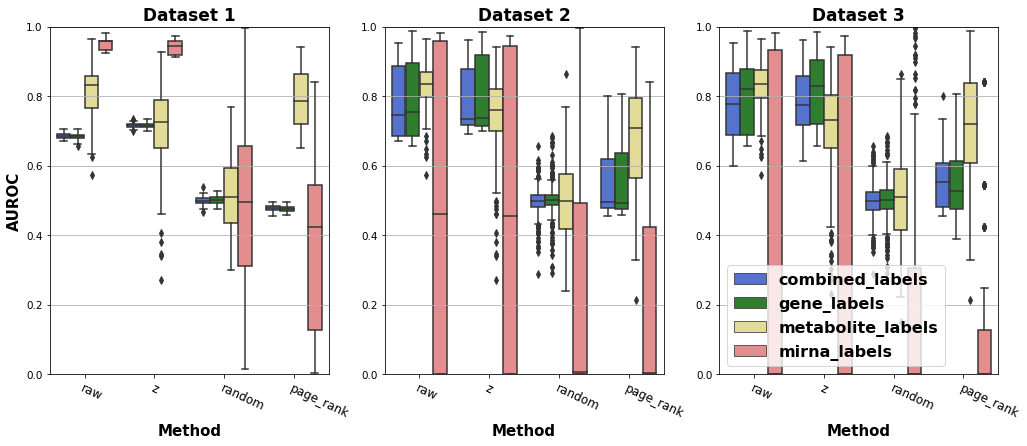

In [23]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_method_entity_integrated['auroc']),
                 x_label='Method',
                 y_label='AUROC',
                 y_lim = [0, 1]
                )


In [140]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_method_entity_integrated['auroc']), True, "AUROC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUROC,p_value,Significant difference
Dataset 1,"('raw_on_integrated_graph', 'z_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'random_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'page_rank_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'raw_on_gene_subgraph')",0.369504,False
Dataset 1,"('raw_on_integrated_graph', 'z_on_gene_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'random_on_gene_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'page_rank_on_gene_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'raw_on_metabolite_subgraph')",3.43391e-17,True
Dataset 1,"('raw_on_integrated_graph', 'z_on_metabolite_subgraph')",0.0247536,False
Dataset 1,"('raw_on_integrated_graph', 'random_on_metabolite_subgraph')",1.54659e-17,True


### 4.2. Metrics AUPRC

#### Genes

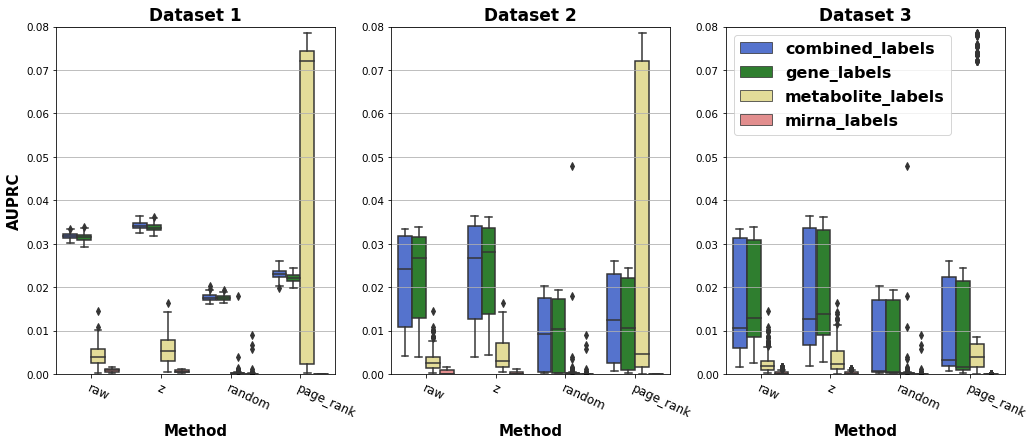

In [24]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_method_entity_integrated['auprc']),
                 x_label='Method',
                 y_label='AUPRC',
                 y_lim = [0, 0.08]
                )


In [142]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_method_entity_integrated['auprc']), True, "AUPRC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUPRC,p_value,Significant difference
Dataset 1,"('raw_on_integrated_graph', 'z_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'random_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'page_rank_on_integrated_graph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'raw_on_gene_subgraph')",0.0139557,True
Dataset 1,"('raw_on_integrated_graph', 'z_on_gene_subgraph')",8.77788e-18,True
Dataset 1,"('raw_on_integrated_graph', 'random_on_gene_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'page_rank_on_gene_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'raw_on_metabolite_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'z_on_metabolite_subgraph')",3.89656e-18,True
Dataset 1,"('raw_on_integrated_graph', 'random_on_metabolite_subgraph')",3.89656e-18,True
